### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import confusion_matrix
import joblib
from tqdm import tqdm
import pydotplus
import itertools
import shap

# modelos base
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import lightgbm as lgb

# Keras Imports
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

shap.initjs()
%matplotlib inline

Using TensorFlow backend.


### Variaveis globais e parametros

In [2]:
nome_arquivo_input = 'default of credit card clients.xls'

taxa_conversao = 0.18

# Classes
classes=['Não Inadimplente',
'Inadimplente']

lista_colunas = ['Valor',
'Genero',
'Grau_Educacao',
'Estado_Civil',
'Idade',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Inadimplente']


lista_colunas_converter_moeda = ['Valor',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6']

lista_colunas_corr = ['Valor',
'Idade',
'Atraso',
'Fatura',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Estado_Civil_0',
'Estado_Civil_1',
'Estado_Civil_2',
'Estado_Civil_3',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6']

lista_colunas_normalizar = ['Valor',
'Atraso',
'Fatura',
'Idade',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1', 
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6']

lista_colunas_train_full = ['Valor',
'Atraso',
'Fatura',
'Valor_norm',
'Genero',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Estado_Civil_0',
'Estado_Civil_1',
'Estado_Civil_2',
'Estado_Civil_3',
'Idade_norm',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1_norm',
'Conta_Valor_2_norm',
'Conta_Valor_3_norm',
'Conta_Valor_4_norm',
'Conta_Valor_5_norm',
'Conta_Valor_6_norm',
'Pagamento_Valor_1_norm',
'Pagamento_Valor_2_norm',
'Pagamento_Valor_3_norm',
'Pagamento_Valor_4_norm',
'Pagamento_Valor_5_norm',
'Pagamento_Valor_6_norm',
'Grau_Educacao',
'Estado_Civil',
'Idade',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6']

lista_colunas_train_sem_norm_sem_one_hot = ['Valor',
'Genero',
'Grau_Educacao',
'Estado_Civil',
'Idade',
'Fatura',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6']

lista_colunas_train_sem_norm_com_one_hot = ['Valor',
'Atraso',
'Fatura',
'Genero',
'Grau_Educacao',
'Estado_Civil',
'Idade',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Estado_Civil_0',
'Estado_Civil_1',
'Estado_Civil_2',
'Estado_Civil_3',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8']

lista_colunas_train_com_norm_sem_one_hot = ['Valor_norm',
'Genero',
'Grau_Educacao',
'Estado_Civil',
'Idade_norm',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1_norm',
'Conta_Valor_2_norm',
'Conta_Valor_3_norm',
'Conta_Valor_4_norm',
'Conta_Valor_5_norm',
'Conta_Valor_6_norm',
'Pagamento_Valor_1_norm',
'Pagamento_Valor_2_norm',
'Pagamento_Valor_3_norm',
'Pagamento_Valor_4_norm',
'Pagamento_Valor_5_norm',
'Pagamento_Valor_6_norm',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6']

lista_colunas_train_com_norm_com_one_hot = ['Valor_norm',
'Genero',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Estado_Civil_0',
'Estado_Civil_1',
'Estado_Civil_2',
'Estado_Civil_3',
'Idade_norm',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1_norm',
'Conta_Valor_2_norm',
'Conta_Valor_3_norm',
'Conta_Valor_4_norm',
'Conta_Valor_5_norm',
'Conta_Valor_6_norm',
'Pagamento_Valor_1_norm',
'Pagamento_Valor_2_norm',
'Pagamento_Valor_3_norm',
'Pagamento_Valor_4_norm',
'Pagamento_Valor_5_norm',
'Pagamento_Valor_6_norm',
'Conta_Slope',
'Conta_Intercept',
'Pagamento_Slope',
'Pagamento_Intercept',
'Conta_Valor_count_0',
'Conta_Valor_count_10000',
'Conta_Valor_count_30000',
'Pagamento_Valor_count_0',
'Pagamento_Valor_count_1000',
'Pagamento_Valor_count_10000',
'Pagamento_Conta_1',
'Pagamento_Conta_2',
'Pagamento_Conta_3',
'Pagamento_Conta_4',
'Pagamento_Conta_5',
'Pagamento_Conta_6']

# obs: alguns dos dados poderiam ser float nesse contexto (como valor e idade, por exemplo)
# mas no domínio do problema todos são inteiros
# então para economia de memória estou tratando-os como inteiros
dict_tipos = {'Valor':int,
'Genero':int,
'Grau_Educacao':int,
'Estado_Civil':int,
'Idade':int,
'Status_Pagamento_1':int,
'Status_Pagamento_2':int,
'Status_Pagamento_3':int,
'Status_Pagamento_4':int,
'Status_Pagamento_5':int,
'Status_Pagamento_6':int,
'Conta_Valor_1':float,
'Conta_Valor_2':float,
'Conta_Valor_3':float,
'Conta_Valor_4':float,
'Conta_Valor_5':float,
'Conta_Valor_6':float,
'Pagamento_Valor_1':float,
'Pagamento_Valor_2':float,
'Pagamento_Valor_3':float,
'Pagamento_Valor_4':float,
'Pagamento_Valor_5':float,
'Pagamento_Valor_6':float,
'Inadimplente':int}

lista_top_vars_com_norm_com_onehot = ['Status_Pagamento_1_0',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_-2',
'Status_Pagamento_4_5',
'Grau_Educacao_0',
'Estado_Civil_0',
'Status_Pagamento_2_4',
'Grau_Educacao_5',
'Status_Pagamento_4_6',
'Status_Pagamento_6_6',
'Status_Pagamento_2_6',
'Status_Pagamento_6_0',
'Status_Pagamento_5_7',
'Status_Pagamento_2_5',
'Status_Pagamento_1_4',
'Status_Pagamento_6_8',
'Status_Pagamento_1_6',
'Grau_Educacao_2',
'Status_Pagamento_6_3',
'Grau_Educacao_3',
'Status_Pagamento_1_-1',
'Grau_Educacao_4',
'Status_Pagamento_4_1',
'Grau_Educacao_1',
'Status_Pagamento_5_4',
'Status_Pagamento_5_-1',
'Status_Pagamento_2_1',
'Status_Pagamento_6_-1',
'Status_Pagamento_2_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_3_6',
'Status_Pagamento_6_5',
'Status_Pagamento_4_2',
'Status_Pagamento_2_7',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_8',
'Status_Pagamento_1_5',
'Status_Pagamento_5_6',
'Pagamento_Valor_2_norm',
'Status_Pagamento_5_0',
'Status_Pagamento_2_-1',
'Valor_norm',
'Estado_Civil_3',
'Pagamento_Valor_1_norm',
'Conta_Valor_2_norm',
'Status_Pagamento_4_7']

lista_colunas_modelo_final = ['Valor',
'Status_Pagamento_1',
'Conta_Slope',
'Pagamento_Conta_5',
'Pagamento_Valor_1',
'Idade',
'Pagamento_Valor_4',
'Pagamento_Valor_2',
'Pagamento_Conta_1',
'Pagamento_Valor_3',
'Pagamento_Conta_3',
'Pagamento_Intercept',
'Conta_Intercept',
'Pagamento_Slope',
'Conta_Valor_1',
'Pagamento_Conta_2',
'Pagamento_Conta_6',
'Pagamento_Valor_5',
'Pagamento_Conta_4',
'Conta_Valor_2',
'Status_Pagamento_6',
'Estado_Civil',
'Pagamento_Valor_count_1000',
'Genero',
'Pagamento_Valor_count_0',
'Conta_Valor_3',
'Status_Pagamento_3',
'Conta_Valor_count_0',
'Pagamento_Valor_6',
'Conta_Valor_4',
'Status_Pagamento_2',
'Conta_Valor_6',
'Grau_Educacao',
'Status_Pagamento_5',
'Status_Pagamento_4',
'Conta_Valor_5',
'Conta_Valor_count_10000']

### Metodos Customizados

In [3]:
# Metodos customizados uteis para o problema
class HelperClass(object):
        
    # estrelas
    @staticmethod
    def stars():
        '''Alguns asteríscos apenas para formatação de output'''
        print ("*"*30)
        
        
    # imprime valores unicos por coluna
    @staticmethod
    def unique_values_df(df, colunas):
        '''Retorna quantidade de valores únicos de cada coluna'''
        for coluna in colunas:
            print (coluna)
            print (df[coluna].unique().tolist())
            print ('*****')

            
    # retorna quantidade de valores unicos por coluna
    @staticmethod
    def unique_count_df(df, colunas):
        '''Retorna dataframe com a quantidade de valores únicos de cada coluna'''
        lista_tamanhos = []
        for coluna in colunas:
            lista_tamanhos.append(len(df[coluna].unique()))
        return (pd.DataFrame({'Coluna':colunas, 'Quantidade_Unicos':lista_tamanhos}))

    
    # imprime quantidade de vezes que cada valor aparece por coluna
    @staticmethod
    def value_counts_df(df, colunas):
        for coluna in colunas:
            print (coluna)
            print (df[coluna].value_counts(dropna=False, normalize=True))
            print ('*****')


    # plot de importancia das features
    @staticmethod
    def plot_feature_importance(columns, feature_importances, max_vars):
        '''Retorna dataframe com a importânia de cada variável para o modelo'''
        df_plot = pd.DataFrame({'Feature': columns, 'Feature importance': feature_importances})
        df_plot = df_plot.sort_values(by='Feature importance', ascending=False).reset_index(drop=True)
        plt.figure(figsize = (8,6))
        plt.title('Features importance', fontsize=14)
        df_plot_reduzido = df_plot.loc[:max_vars, :]
        plt.barh(range(len(df_plot_reduzido))[::-1], df_plot_reduzido['Feature importance'],
                                                     color="blue", align="center")
        
        plt.yticks(range(len(df_plot_reduzido))[::-1], df_plot_reduzido['Feature'])
        plt.show()
        return df_plot
    
    
    # calcula o auc do modelo
    @staticmethod
    def calcula_auc(y_true, y_scores):
        '''Retorna AUROC (AUC) do modelo'''
        return roc_auc_score(y_true, y_scores)
    
    
    # mostra metricas do modelo em formato dataframe
    @staticmethod
    def print_dataframe(values):
        '''Mostra diversas métricas do modelo para um determinado threshold'''
        metrics_print = ['True Positive', 'True Negative', 'False Negative', 'False Positive',
    'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'Roc Auc Score']

        df_metrics = pd.DataFrame(
            {'Metrics': metrics_print,
             'Values': values
            })

        print (df_metrics.to_string(header=False, index=False))
        HelperClass.stars()
    

    # Metodo para plotar a matrix de confusao
    @staticmethod
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix:")
        else:
            print('Confusion matrix, without normalization:')

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        rcParams['figure.figsize'] = 6,4
        plt.figure(figsize = (6,4))
        plt.show()


    # Plota curva roc
    @staticmethod
    def plot_roc_curve(y_true, y_scores):

        fpr, tpr, thresholds = roc_curve(y_true, y_scores)

        HelperClass.stars()
        print ("Roc Curve:")
        HelperClass.stars()

        plt.plot(fpr, tpr, label = 'ROC Curve', linewidth = 2)
        plt.plot([0,1],[0,1], 'k--', linewidth = 2, color='grey')
        plt.title('ROC Curve')
        plt.xlim([0.0, 1.05])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()


    # Curva de Precisão e Revocação
    @staticmethod
    def plot_precision_recall_curve(y_true, y_scores):

        HelperClass.stars()
        print ("Precision Recall Curve:")
        HelperClass.stars()

        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

        plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')

        plt.plot(recall, precision, linewidth=2)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall Curve')
        plt.show()


    # Mostra o report completo da classificação
    @staticmethod
    def show_full_classification_report(y_true, y_pred, y_scores, classes):
        '''Report customizado para modelos de classificação'''
        HelperClass.stars()
        print ("Metrics Report:")
        HelperClass.stars()

        cm = confusion_matrix(y_true, y_pred)

        true_positive = cm[1,1]
        true_negative = cm[0,0]
        false_negative = cm[1,0]
        false_positive = cm[0,1]

        accuracy = ((true_positive + true_negative)/(true_positive + true_negative + false_negative + false_positive))
        precision = (true_positive/(true_positive + false_positive))
        recall = (true_positive/(true_positive + false_negative))  
        sensitivity = (true_positive/(true_positive + false_negative))  
        specificity = (true_negative/(true_negative + false_positive))  
        f1_score = ((2 * precision * recall)/(precision + recall))
        roc_auc = roc_auc_score(y_true, y_scores)
    
        print ("Classification Report:")
        HelperClass.stars()

        values = []

        values.append(true_positive)
        values.append(true_negative)
        values.append(false_negative)
        values.append(false_positive)
        values.append('{:.4f}'.format(accuracy))
        values.append('{:.4f}'.format(precision))
        values.append('{:.4f}'.format(recall))
        values.append('{:.4f}'.format(specificity))
        values.append('{:.4f}'.format(f1_score))
        values.append('{:.4f}'.format(roc_auc))

        HelperClass.print_dataframe(values)

        HelperClass.plot_confusion_matrix(cm, classes)

        HelperClass.plot_roc_curve(y_true, y_scores)

        HelperClass.plot_precision_recall_curve(y_true, y_scores)
        
    
    @staticmethod
    def conta_regressao(df):
        for i in range(len(df)):
            lista_valores = [df.iloc[i]["Conta_Valor_1"], df.iloc[i]["Conta_Valor_2"], df.iloc[i]["Conta_Valor_3"],
                             df.iloc[i]["Conta_Valor_4"], df.iloc[i]["Conta_Valor_5"], df.iloc[i]["Conta_Valor_6"]]
            slope, intercept, _, _, _ = stats.linregress([1,2,3,4,5,6], lista_valores)
            slope = round(slope, 2)
            intercept = round(intercept, 2)
            df.loc[df.index[i], "Conta_Slope"] = slope
            df.loc[df.index[i], "Conta_Intercept"] = intercept
        return df
    
    
    @staticmethod
    def pagamento_regressao(df):
        for i in range(len(df)):
            lista_valores = [df.iloc[i]["Pagamento_Valor_1"], df.iloc[i]["Pagamento_Valor_2"],
                             df.iloc[i]["Pagamento_Valor_3"], df.iloc[i]["Pagamento_Valor_4"],
                             df.iloc[i]["Pagamento_Valor_5"], df.iloc[i]["Pagamento_Valor_6"]]
            
            slope, intercept, _, _, _ = stats.linregress([1,2,3,4,5,6], lista_valores)
            slope = round(slope, 2)
            intercept = round(intercept, 2)
            df.loc[df.index[i], "Pagamento_Slope"] = slope
            df.loc[df.index[i], "Pagamento_Intercept"] = intercept
        return df

    
    @staticmethod
    # conta quantos meses tiveram fatura ou pagamento menor ou igual ao threshold
    def contagem_threshold(df):
        data = df.copy()
        
        thresholds = [0,10000,30000]
        label = "Conta_Valor_"
        
        for threshold in thresholds:
            for i in range(len(data)):
                count = 0
                for j in range(1,7):
                    if data.loc[data.index[i], label + str(j)] <= threshold:
                        count += 1
                data.loc[data.index[i], label + "count_" + str(threshold)] = count
                
        thresholds = [0,1000,10000]
        label = "Pagamento_Valor_"
        
        for threshold in thresholds:
            for i in range(len(data)):
                count = 0
                for j in range(1,7):
                    if data.loc[data.index[i], label + str(j)] <= threshold:
                        count += 1
                data.loc[data.index[i], label + "count_" + str(threshold)] = count
                
        return data
    
    
    @staticmethod
    def funcao(x):
        return float(1)/float(1+np.exp(x))

    
    @staticmethod
    def funcao_pagamento(bill, pay):
        # computa quanto da fatura foi paga no mês
        if bill > 0:
            if pay < bill:
                result = (pay/bill)
            else:
                result = 1 + HelperClass.funcao(pay)
        elif bill == 0:
            if pay != 0:
                result = 2 + HelperClass.funcao(pay)
            if pay == 0:
                result = 1
        else:
            if pay == 0:
                result = 3 + HelperClass.funcao(pay)
            if pay > 0:
                result = 4 + HelperClass.funcao(pay) 
        return result
    
    
    @staticmethod
    # calcula porcentagem do valor que foi pago
    def calcula_pagamento(df):
        data = df.copy()
        for i in range(len(data)):
            temp = pd.DataFrame.transpose(pd.DataFrame(data=data.iloc[i]))
            for j in range(1,7):
                temp.loc[j] = temp.iloc[0]
            temp["VAL"] = 0
            for j in range(1,7):
                bill = data.loc[data.index[i], "Conta_Valor_" + str(j)]
                pay = data.loc[data.index[i], "Pagamento_Valor_" + str(j)]
                data.loc[data.index[i], "Pagamento_Conta_" + str(j)] = HelperClass.funcao_pagamento(bill, pay)
        return data
    
    
    @staticmethod
    # metodo para implementar toda a engenharia de variaveis
    def implementa_engenharia_variaveis(df):
        pbar = tqdm(total=4)
        df = HelperClass.conta_regressao(df)
        pbar.update(1)
        
        df = HelperClass.pagamento_regressao(df)
        pbar.update(1)
        
        df = HelperClass.contagem_threshold(df)
        pbar.update(1)
        
        df = HelperClass.calcula_pagamento(df)
        pbar.update(1)
        pbar.close()
        print ('Engenharia de variáveis finalizada...')
        
        return df
    
        
    @staticmethod
    # one hot encoding da base
    def aplica_one_hot_encoding(df):
        # Grau Educação
        dummies = pd.get_dummies(df['Grau_Educacao']).rename(columns=lambda x: 'Grau_Educacao_' + str(x))
        df = pd.concat([df, dummies], axis=1)
        # Estado_Civil
        dummies = pd.get_dummies(df['Estado_Civil']).rename(columns=lambda x: 'Estado_Civil_' + str(x))
        df = pd.concat([df, dummies], axis=1)
        # Status do Pagamento
        for mes in range(1, 7):
            dummies = pd.get_dummies(df['Status_Pagamento_{}'.format(mes)]).\
                                     rename(columns=lambda x: 'Status_Pagamento_{}_'.format(mes) + str(x))
            df = pd.concat([df, dummies], axis=1)
        return df
    
    
    @staticmethod
    # converte moeda de NT dolares para Reais
    def converte_moeda_reais(df, lista_colunas_converter_moeda, taxa_conversao):
        for column in lista_colunas_converter_moeda:
            df[column] = df[column] * taxa_conversao
        return df
    
    
    @staticmethod
    # calcula fatura total
    def calcula_fatura_total(df):
        df['Fatura'] = df['Conta_Valor_1'] +\
                       df['Conta_Valor_2'] +\
                       df['Conta_Valor_3'] +\
                       df['Conta_Valor_4'] +\
                       df['Conta_Valor_5'] +\
                       df['Conta_Valor_6']
        return df
    
    
    @staticmethod
    # calcula atraso total
    def calcula_atraso_total(df):
        df['Atraso'] = (df['Conta_Valor_1'] - df['Pagamento_Valor_1']) +\
                       (df['Conta_Valor_2'] - df['Pagamento_Valor_2']) +\
                       (df['Conta_Valor_3'] - df['Pagamento_Valor_3']) +\
                       (df['Conta_Valor_4'] - df['Pagamento_Valor_4']) +\
                       (df['Conta_Valor_5'] - df['Pagamento_Valor_5']) +\
                       (df['Conta_Valor_6'] - df['Pagamento_Valor_6'])
        return df
    
    
    @staticmethod
    # calcula o lucro total ao aplicar a regra de negócio
    def calcula_lucro(valor_fatura_total,
                      porcentagem_fatura_valor_true_negative,
                      porcentagem_fatura_valor_false_negative,
                      porcentagem_fatura_valor_false_positive,
                      porcentagem_fatura_valor_true_positive,
                      qtd_true_positive, qtd_false_positive):
        
        # constantes
        porcentagem_recuperacao_credito = 0.3
        porcentagem_lucro = 0.05
        preco_ligacao = 50
        
        porcentagem_perda = 1 - porcentagem_recuperacao_credito

        lucro =  ((porcentagem_fatura_valor_true_negative * valor_fatura_total * porcentagem_lucro)\
                - (porcentagem_fatura_valor_false_positive * valor_fatura_total * porcentagem_perda)\
                - (porcentagem_fatura_valor_true_positive * valor_fatura_total * porcentagem_perda)\
                - (porcentagem_fatura_valor_false_negative * valor_fatura_total)\
                - (preco_ligacao * qtd_true_positive)\
                - (preco_ligacao * qtd_false_positive))

        lucro = round(lucro, 2)
        return lucro
    
    
    @staticmethod
    # Normalização dos dados
    def normaliza_dados(df):
        for coluna in lista_colunas_normalizar:
            ## Normaliza os dados
            df['{}_norm'.format(coluna)] = StandardScaler().fit_transform(df[coluna].values.reshape(-1,1))
        return df
    
    
    @staticmethod
    # mostra os resultados do modelo
    def mostra_resultados_modelo(cm, porcentagem_qtd_true_positive,
                       porcentagem_qtd_false_negative,
                       porcentagem_valor_true_positive,
                       porcentagem_valor_false_negative):

        true_positive = cm[1,1]
        true_negative = cm[0,0]
        false_negative = cm[1,0]
        false_positive = cm[0,1]

        accuracy = ((true_positive + true_negative)/(true_positive + true_negative + false_negative + false_positive))
        precision = (true_positive/(true_positive + false_positive))
        recall = (true_positive/(true_positive + false_negative))  
        sensitivity = (true_positive/(true_positive + false_negative))  
        specificity = (true_negative/(true_negative + false_positive))  
        f1_score = ((2 * precision * recall)/(precision + recall))
        inadimplencia_fisica = round((porcentagem_qtd_true_positive + porcentagem_qtd_false_negative), 4)
        inadimplencia_financeira = round((porcentagem_valor_true_positive + porcentagem_valor_false_negative), 4)

        print ("Classification Report:")
        HelperClass.stars()

        values = []

        values.append(inadimplencia_fisica)
        values.append(inadimplencia_financeira)
        values.append(true_positive)
        values.append(true_negative)
        values.append(false_negative)
        values.append(false_positive)
        values.append('{:.4f}'.format(accuracy))
        values.append('{:.4f}'.format(precision))
        values.append('{:.4f}'.format(recall))
        values.append('{:.4f}'.format(specificity))
        values.append('{:.4f}'.format(f1_score))

        metrics_print = ['Inadimplencia Fisica', 'Inadimplencia Financeira',
                         'True Positive', 'True Negative', 'False Negative', 'False Positive',
                         'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']

        df_metrics = pd.DataFrame({'Metrics': metrics_print, 'Values': values})

        print (df_metrics.to_string(header=False, index=False))

        HelperClass.plot_confusion_matrix(cm, [0, 1])
        
        
    @staticmethod
    # printa resultados do modelo
    def print_resultados_modelo(porcentagem_qtd_true_negative,
                                porcentagem_qtd_false_negative,
                                porcentagem_qtd_true_positive,
                                porcentagem_qtd_false_positive,
                                porcentagem_valor_true_negative,
                                porcentagem_valor_false_negative,
                                porcentagem_valor_true_positive,
                                porcentagem_valor_false_positive,
                                porcentagem_fatura_valor_true_negative,
                                porcentagem_fatura_valor_false_negative,
                                porcentagem_fatura_valor_true_positive,
                                porcentagem_fatura_valor_false_positive):

        HelperClass.stars()
        print ('Matriz de confusão do público em quantidade:')
        HelperClass.stars()
        print ('Verdadeiro Negativos: {}%'.format(round ((100 * porcentagem_qtd_true_negative), 2)))
        print ('Falso Negativos: {}%'.format(round ((100 * porcentagem_qtd_false_negative), 2)))
        print ('Verdadeiro Positivos: {}%'.format(round ((100 * porcentagem_qtd_true_positive), 2)))
        print ('Falso Positivos: {}%'.format(round ((100 * porcentagem_qtd_false_positive), 2)))
        HelperClass.stars()

        print ('Matriz de confusão do público em valor atrasado:')
        HelperClass.stars()
        print ('Verdadeiro Negativos: {}%'.format(round ((100 * porcentagem_valor_true_negative), 2)))
        print ('Falso Negativos: {}%'.format(round ((100 * porcentagem_valor_false_negative), 2)))
        print ('Verdadeiro Positivos: {}%'.format(round ((100 * porcentagem_valor_true_positive), 2)))
        print ('Falso Positivos: {}%'.format(round ((100 * porcentagem_valor_false_positive), 2)))
        HelperClass.stars()

        print ('Matriz de confusão do público em valor da fatura:')
        HelperClass.stars()
        print ('Verdadeiro Negativos: {}%'.format(round ((100 * porcentagem_fatura_valor_true_negative), 2)))
        print ('Falso Negativos: {}%'.format(round ((100 * porcentagem_fatura_valor_false_negative), 2)))
        print ('Verdadeiro Positivos: {}%'.format(round ((100 * porcentagem_fatura_valor_true_positive), 2)))
        print ('Falso Positivos: {}%'.format(round ((100 * porcentagem_fatura_valor_false_positive), 2)))
        HelperClass.stars()

### Leitura e pre-processamento dos dados

In [4]:
'''
Metadados das variáveis disponíveis na base:

ID: ID de cada cliente
LIMIT_BAL: Valor do crédito (R$)
SEX: Gênero (1=homem, 2=mulher)
EDUCATION: (1=graduação, 2=universidade, 3=ensino médio, 4=outros)
MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)
AGE: Idade em anos
PAY_0: Status de pagamento em Setembro de 2005
PAY_2: Status de pagamento em Agosto de 2005
PAY_3: Status de pagamento em Julho de 2005
PAY_4: Status de pagamento em Junho de 2005
PAY_5: Status de pagamento em Maio de 2005
PAY_6: Status de pagamento em Abril de 2005
BILL_AMT1: Fatura do cartão em Setembro de 2
BILL_AMT2: Fatura do cartão em Agosto de 200
BILL_AMT3: Fatura do cartão em Julho de 2005
BILL_AMT4: Fatura do cartão em Junho de 2005
BILL_AMT5: Fatura do cartão em Maio de 2005
BILL_AMT6: Fatura do cartão em Abril de 2005
PAY_AMT1: Valor do pago da fatura do cartão em Setembro de 2
PAY_AMT2: Valor do pago da fatura do cartão em Agosto de 200
PAY_AMT3: Valor do pago da fatura do cartão em Julho de 2005
PAY_AMT4: Valor do pago da fatura do cartão em Junho de 2005
PAY_AMT5: Valor do pago da fatura do cartão em Maio de 2005
PAY_AMT6: Valor do pago da fatura do cartão em Abril de 2005
default: inadimplência (1=sim, 0=não)
'''

'\nMetadados das variáveis disponíveis na base:\n\nID: ID de cada cliente\nLIMIT_BAL: Valor do crédito (R$)\nSEX: Gênero (1=homem, 2=mulher)\nEDUCATION: (1=graduação, 2=universidade, 3=ensino médio, 4=outros)\nMARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)\nAGE: Idade em anos\nPAY_0: Status de pagamento em Setembro de 2005\nPAY_2: Status de pagamento em Agosto de 2005\nPAY_3: Status de pagamento em Julho de 2005\nPAY_4: Status de pagamento em Junho de 2005\nPAY_5: Status de pagamento em Maio de 2005\nPAY_6: Status de pagamento em Abril de 2005\nBILL_AMT1: Fatura do cartão em Setembro de 2\nBILL_AMT2: Fatura do cartão em Agosto de 200\nBILL_AMT3: Fatura do cartão em Julho de 2005\nBILL_AMT4: Fatura do cartão em Junho de 2005\nBILL_AMT5: Fatura do cartão em Maio de 2005\nBILL_AMT6: Fatura do cartão em Abril de 2005\nPAY_AMT1: Valor do pago da fatura do cartão em Setembro de 2\nPAY_AMT2: Valor do pago da fatura do cartão em Agosto de 200\nPAY_AMT3: Valor do pago da fatura do cart

In [5]:
# leitura da base
df_input = pd.read_excel(nome_arquivo_input).iloc[1:, 1:].reset_index(drop=True)

# renomeia colunas (de acordo com os metadados disponibilizados) para portugês, para facilitar o entendimento
df_input.columns = lista_colunas

# transforma a coluna no tipo certo
for column in df_input.columns.tolist():
    df_input[column] = df_input[column].astype(dict_tipos[column])
    
# Converte a moeda de NT Dolares para Reais
df_input = HelperClass.converte_moeda_reais(df_input, lista_colunas_converter_moeda, taxa_conversao)
    
# transforma genero em binário [0, 1] para facilitar o entendimento
df_input['Genero'] = df_input['Genero'].map({2:1, 1:0})

# o Dataset tem tamanho: 30.000 observações e 24 colunas (23 variáveis explicativas e 1 variável resposta binária) 
print ('Shape do dataset:', df_input.shape)

# o dataset não possui valores NaN convencionais em nenhuma coluna
# contudo, existem valores 0 em algumas colunas que não constam no metadados, sugerindo ser um valor desconhecido
print ('Possui NaN?:', df_input.isnull().values.any())

# Fatura total
df_input = HelperClass.calcula_fatura_total(df_input)

# Atraso total
df_input = HelperClass.calcula_atraso_total(df_input)

print ('Dataset shape:', df_input.shape)

Shape do dataset: (30000, 24)
Possui NaN?: False
Dataset shape: (30000, 26)


In [6]:
# primeiras 5 linhas da base
df_input.head()

Valor  Genero  Grau_Educacao  Estado_Civil  Idade  Status_Pagamento_1  Status_Pagamento_2  Status_Pagamento_3  Status_Pagamento_4  Status_Pagamento_5  Status_Pagamento_6  Conta_Valor_1  Conta_Valor_2  Conta_Valor_3  Conta_Valor_4  Conta_Valor_5  Conta_Valor_6  Pagamento_Valor_1  Pagamento_Valor_2  Pagamento_Valor_3  Pagamento_Valor_4  Pagamento_Valor_5  Pagamento_Valor_6  Inadimplente    Fatura    Atraso
0   3600.0       1              2             1     24                   2                   2                  -1                  -1                  -2                  -2         704.34         558.36         124.02           0.00           0.00           0.00               0.00             124.02                0.0                0.0               0.00               0.00             1   1386.72   1262.70
1  21600.0       1              2             2     26                  -1                   2                   0                   0                   0                   2         482.76         310.50         482.76         588.96         621.90         586.98               0.00             180.00              180.0              180.0               0.00             360.00             1   3073.86   2173.86
2  16200.0       1              2             2     34                   0                   0                   0                   0                   0                   0        5263.02        2524.86        2440.62        2579.58        2690.64        2798.82             273.24             270.00              180.0              180.0             180.00             900.00             0  18297.54  16314.30
3   9000.0       1              2             1     37                   0                   0                   0                   0                   0                   0        8458.20        8681.94        8872.38        5096.52        5212.62        5318.46             360.00             363.42              216.0              198.0             192.42             180.00             0  41640.12  40130.28
4   9000.0       0              2             1     57                  -1                   0                  -1                   0                   0                   0        1551.06        1020.60        6450.30        3769.20        3446.28        3443.58             360.00            6602.58             1800.0             1620.0             124.02             122.22             0  19681.02   9052.20

### Engenharia de Variaveis

In [7]:
# nessa etapa são criadas algumas variáveis que, pela minha experiência em Crédito, fazem sentido
# para cada pagamento de fatura (mês a mês durante 6 meses), é criada uma variável com a porcentagem de pagamento da fatura
# também unifiquei a tendência das variáveis tempurais de contas e pagamentos através
# de variáveis de slope e intercept (alpha e beta)
# e criei algumas features auxiliares que trazem informações adicionais sobre o pagamento das faturas anteriores

df_input = HelperClass.implementa_engenharia_variaveis(df_input)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [09:10<00:00, 137.50s/it]

Engenharia de variáveis finalizada...


### One Hot Encoding

In [8]:
# One Hot Encoding das variáveis categóricas: Grau de educação, estado civil e status dos pagamentos
# Nem todos os algoritmos precisam de variáveis One Hot (por ex: a maioria dos modelos baseados em árvore)
# Mas alguns dos algoritmos utilizados neste estudo precisam (regressão logística e knn, por exemplo)
# Desse modo, para os modelos que precisam de One Hot Encoding, serão passadas as variáveis dessa forma
# Para os que não precisam, serão passadas as variáveis como valor inteiro
# e o modelo será livre para decidir como prefere realizar a tomada de decisão

# One Hot Encoding da base
df_input = HelperClass.aplica_one_hot_encoding(df_input)

## 1. Modelo de Negócio e Impacto

### 1.1) Crie um processo para estimar o impacto financeiro

In [9]:
# Tamanho do público
tamanho_publico_total = len(df_input)
print ('Tamanho do público:', tamanho_publico_total)

Tamanho do público: 30000


In [10]:
# Valor total do limite de crédito
valor_total = df_input['Valor'].sum()
print ('Limite total (R$):', valor_total)

Limite total (R$): 904415342.4


In [11]:
# Valor total em atraso nos últimos 6 meses
valor_atraso_total = df_input['Atraso'].sum()
print ('Valor Total Atraso:', valor_atraso_total)

Valor Total Atraso: 1286335504.62


In [12]:
# Valor total das faturas nos últimos 6 meses
valor_fatura_total = df_input['Fatura'].sum()
print ('Valor Total Faturas:', valor_fatura_total)

Valor Total Faturas: 1457253024.4799998


In [13]:
# o lucro atual (ou seja, se não ligarem pra ninguém) é:
df_input['pred_regra_negocio'] = 0

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

print ('Lucro Atual:', lucro)

******************************
Matriz de confusão do público em quantidade:
******************************
Verdadeiro Negativos: 77.88%
Falso Negativos: 22.12%
Verdadeiro Positivos: 0.0%
Falso Positivos: 0.0%
******************************
Matriz de confusão do público em valor atrasado:
******************************
Verdadeiro Negativos: 77.63%
Falso Negativos: 22.37%
Verdadeiro Positivos: 0.0%
Falso Positivos: 0.0%
******************************
Matriz de confusão do público em valor da fatura:
******************************
Verdadeiro Negativos: 78.62%
Falso Negativos: 21.38%
Verdadeiro Positivos: 0.0%
Falso Positivos: 0.0%
******************************
Lucro Atual: -254262542.91


In [14]:
# Simplificação do cálculo do lucro atual do modelo
porcentagem_fat_paga = df_input.loc[df_input['Inadimplente'] == 0]['Fatura'].sum() / valor_fatura_total
porcentagem_fat_nao_paga = (1 - porcentagem_fat_paga)

print ('Porcentagem da fatura paga:', porcentagem_fat_paga)
print ('Porcentagem da fatura não paga:', porcentagem_fat_nao_paga)
lucro = round(((porcentagem_fat_paga * valor_fatura_total * 0.05) - (porcentagem_fat_nao_paga * valor_fatura_total)),2)
print ('Lucro Atual:', lucro)

Porcentagem da fatura paga: 0.7862088472582369
Porcentagem da fatura não paga: 0.21379115274176308
Lucro Atual: -254262542.91


## 2. Análise Exploratória e Qualidade dos Dados

### 2.1) Análise Exploratória de Dados (EDA)

In [15]:
# tamanho do dataset criado: 30.000 observações e 51 colunas (50 variáveis explicativas e 1 variável resposta binária)
df_input.shape

(30000, 118)

In [16]:
# primeiras 5 linhas
df_input.head()

Valor  Genero  Grau_Educacao  Estado_Civil  Idade  Status_Pagamento_1  Status_Pagamento_2  Status_Pagamento_3  Status_Pagamento_4  Status_Pagamento_5  Status_Pagamento_6  Conta_Valor_1  Conta_Valor_2  Conta_Valor_3  Conta_Valor_4  Conta_Valor_5  Conta_Valor_6  Pagamento_Valor_1  Pagamento_Valor_2  Pagamento_Valor_3  Pagamento_Valor_4  Pagamento_Valor_5  Pagamento_Valor_6  Inadimplente    Fatura    Atraso  Conta_Slope  Conta_Intercept  Pagamento_Slope  Pagamento_Intercept  Conta_Valor_count_0  Conta_Valor_count_10000  Conta_Valor_count_30000  Pagamento_Valor_count_0  Pagamento_Valor_count_1000  Pagamento_Valor_count_10000  Pagamento_Conta_1  Pagamento_Conta_2  Pagamento_Conta_3  Pagamento_Conta_4  Pagamento_Conta_5  Pagamento_Conta_6  Grau_Educacao_0  Grau_Educacao_1  Grau_Educacao_2  Grau_Educacao_3  Grau_Educacao_4  Grau_Educacao_5  Grau_Educacao_6  Estado_Civil_0  Estado_Civil_1  Estado_Civil_2  Estado_Civil_3  Status_Pagamento_1_-2  Status_Pagamento_1_-1  \
0   3600.0       1              2             1     24                   2                   2                  -1                  -1                  -2                  -2         704.34         558.36         124.02           0.00           0.00           0.00               0.00             124.02                0.0                0.0               0.00               0.00             1   1386.72   1262.70      -152.02           763.20           -10.63                57.88                  3.0                      6.0                      6.0                      5.0                         6.0                          6.0           0.000000           0.222115           0.000000           1.000000           1.000000           1.000000                0                0                1                0                0                0                0               0               1               0               0                      0                      0   
1  21600.0       1              2             2     26                  -1                   2                   0                   0                   0                   2         482.76         310.50         482.76         588.96         621.90         586.98               0.00             180.00              180.0              180.0               0.00             360.00             1   3073.86   2173.86        44.61           356.16            36.00                24.00                  0.0                      6.0                      6.0                      2.0                         6.0                          6.0           0.000000           0.579710           0.372856           0.305623           0.000000           0.613309                0                0                1                0                0                0                0               0               0               1               0                      0                      1   
2  16200.0       1              2             2     34                   0                   0                   0                   0                   0                   0        5263.02        2524.86        2440.62        2579.58        2690.64        2798.82             273.24             270.00              180.0              180.0             180.00             900.00             0  18297.54  16314.30      -333.85          4218.06            81.82                44.16                  0.0                      6.0                      6.0                      0.0                         6.0                          6.0           0.051917           0.106937           0.073752           0.069779           0.066899           0.321564                0                0                1                0                0                0                0               0               0               1               0                      0                      0   
3   9000.0       1              2             1     37                   0           

In [17]:
# lista de colunas
df_input.columns.tolist()

['Valor',
 'Genero',
 'Grau_Educacao',
 'Estado_Civil',
 'Idade',
 'Status_Pagamento_1',
 'Status_Pagamento_2',
 'Status_Pagamento_3',
 'Status_Pagamento_4',
 'Status_Pagamento_5',
 'Status_Pagamento_6',
 'Conta_Valor_1',
 'Conta_Valor_2',
 'Conta_Valor_3',
 'Conta_Valor_4',
 'Conta_Valor_5',
 'Conta_Valor_6',
 'Pagamento_Valor_1',
 'Pagamento_Valor_2',
 'Pagamento_Valor_3',
 'Pagamento_Valor_4',
 'Pagamento_Valor_5',
 'Pagamento_Valor_6',
 'Inadimplente',
 'Fatura',
 'Atraso',
 'Conta_Slope',
 'Conta_Intercept',
 'Pagamento_Slope',
 'Pagamento_Intercept',
 'Conta_Valor_count_0',
 'Conta_Valor_count_10000',
 'Conta_Valor_count_30000',
 'Pagamento_Valor_count_0',
 'Pagamento_Valor_count_1000',
 'Pagamento_Valor_count_10000',
 'Pagamento_Conta_1',
 'Pagamento_Conta_2',
 'Pagamento_Conta_3',
 'Pagamento_Conta_4',
 'Pagamento_Conta_5',
 'Pagamento_Conta_6',
 'Grau_Educacao_0',
 'Grau_Educacao_1',
 'Grau_Educacao_2',
 'Grau_Educacao_3',
 'Grau_Educacao_4',
 'Grau_Educacao_5',
 'Grau_Educacao_6',
 'Estado_Civil_0',
 'Estado_Civil_1',
 'Estado_Civil_2',
 'Estado_Civil_3',
 'Status_Pagamento_1_-2',
 'Status_Pagamento_1_-1',
 'Status_Pagamento_1_0',
 'Status_Pagamento_1_1',
 'Status_Pagamento_1_2',
 'Status_Pagamento_1_3',
 'Status_Pagamento_1_4',
 'Status_Pagamento_1_5',
 'Status_Pagamento_1_6',
 'Status_Pagamento_1_7',
 'Status_Pagamento_1_8',
 'Status_Pagamento_2_-2',
 'Status_Pagamento_2_-1',
 'Status_Pagamento_2_0',
 'Status_Pagamento_2_1',
 'Status_Pagamento_2_2',
 'Status_Pagamento_2_3',
 'Status_Pagamento_2_4',
 'Status_Pagamento_2_5',
 'Status_Pagamento_2_6',
 'Status_Pagamento_2_7',
 'Status_Pagamento_2_8',
 'Status_Pagamento_3_-2',
 'Status_Pagamento_3_-1',
 'Status_Pagamento_3_0',
 'Status_Pagamento_3_1',
 'Status_Pagamento_3_2',
 'Status_Pagamento_3_3',
 'Status_Pagamento_3_4',
 'Status_Pagamento_3_5',
 'Status_Pagamento_3_6',
 'Status_Pagamento_3_7',
 'Status_Pagamento_3_8',
 'Status_Pagamento_4_-2',
 'Status_Pagamento_4_-1',
 'Status_Pagamento_4_0',
 'Status_Pagamento_4_1',
 'Status_Pagamento_4_2',
 'Status_Pagamento_4_3',
 'Status_Pagamento_4_4',
 'Status_Pagamento_4_5',
 'Status_Pagamento_4_6',
 'Status_Pagamento_4_7',
 'Status_Pagamento_4_8',
 'Status_Pagamento_5_-2',
 'Status_Pagamento_5_-1',
 'Status_Pagamento_5_0',
 'Status_Pagamento_5_2',
 'Status_Pagamento_5_3',
 'Status_Pagamento_5_4',
 'Status_Pagamento_5_5',
 'Status_Pagamento_5_6',
 'Status_Pagamento_5_7',
 'Status_Pagamento_5_8',
 'Status_Pagamento_6_-2',
 'Status_Pagamento_6_-1',
 'Status_Pagamento_6_0',
 'Status_Pagamento_6_2',
 'Status_Pagamento_6_3',
 'Status_Pagamento_6_4',
 'Status_Pagamento_6_5',
 'Status_Pagamento_6_6',
 'Status_Pagamento_6_7',
 'Status_Pagamento_6_8',
 'pred_regra_negocio']

In [18]:
# Descrição dos dados
# aqui temos algumas informações interessantes, por exemplo:
# o menor limite de crédito é R$1.800 e o máximo R$ 180.000, com valor médio R$ 30.147

# a idade mínima de um tomador de crédito dessa base é 21 anos e o máximo 79, com idade média 35,5 anos
# o que é bastante interessante, pois pode indicar que o acesso a crédito para jovens entre 18 e 20 e
# adultos com mais de 80 anos talvez seja mais difícil ou tenha alguma restrições regulatórias
df_input.describe()

Valor        Genero  Grau_Educacao  Estado_Civil         Idade  Status_Pagamento_1  Status_Pagamento_2  Status_Pagamento_3  Status_Pagamento_4  Status_Pagamento_5  Status_Pagamento_6  Conta_Valor_1  Conta_Valor_2  Conta_Valor_3  Conta_Valor_4  Conta_Valor_5  Conta_Valor_6  Pagamento_Valor_1  Pagamento_Valor_2  Pagamento_Valor_3  Pagamento_Valor_4  Pagamento_Valor_5  Pagamento_Valor_6  Inadimplente         Fatura         Atraso   Conta_Slope  Conta_Intercept  Pagamento_Slope  Pagamento_Intercept  Conta_Valor_count_0  Conta_Valor_count_10000  Conta_Valor_count_30000  Pagamento_Valor_count_0  Pagamento_Valor_count_1000  Pagamento_Valor_count_10000  Pagamento_Conta_1  Pagamento_Conta_2  Pagamento_Conta_3  Pagamento_Conta_4  Pagamento_Conta_5  Pagamento_Conta_6  Grau_Educacao_0  Grau_Educacao_1  Grau_Educacao_2  Grau_Educacao_3  Grau_Educacao_4  Grau_Educacao_5  Grau_Educacao_6  Estado_Civil_0  Estado_Civil_1  Estado_Civil_2  Estado_Civil_3  Status_Pagamento_1_-2  \
count   30000.000000  30000.000000   30000.000000  30000.000000  30000.000000        30000.000000        30000.000000        30000.000000        30000.000000        30000.000000        30000.000000   30000.000000   30000.000000   30000.000000   30000.000000   30000.000000   30000.000000       30000.000000       30000.000000       30000.000000       30000.000000       30000.000000       30000.000000  30000.000000   30000.000000   30000.000000  30000.000000     30000.000000     30000.000000         30000.000000         30000.000000             30000.000000             30000.000000             30000.000000                30000.000000                 30000.000000       30000.000000       30000.000000       30000.000000       30000.000000       30000.000000       30000.000000     30000.000000     30000.000000     30000.000000     30000.000000     30000.000000     30000.000000     30000.000000    30000.000000    30000.000000    30000.000000    30000.000000           30000.000000   
mean    30147.178080      0.603733       1.853133      1.551867     35.485500           -0.016700           -0.133767           -0.166200           -0.220667           -0.266200           -0.291100    9220.199562    8852.233530    8462.367864    7787.330814    7256.052174    6996.916872        1019.444490        1065.809430         940.622670         868.693836         863.889774         938.790462      0.221200   48575.100816   42877.850154   -473.714151      9753.849571       -30.884500          1057.637571             0.734567                 4.464700                 5.634833                 1.229900                    4.846933                     5.920933           0.385646           0.410117           0.402532           0.405594           0.423667           0.447109         0.000467         0.352833         0.467667         0.163900         0.004100         0.009333         0.001700        0.001800        0.455300        0.532133        0.010767               0.091967   
std     23354.579082      0.489129       0.790349      0.521970      9.217904            1.123802            1.197186            1.196868            1.169139            1.133187            1.149988   13254.454904   12811.278381   12482.889737   11579.914104   10943.488039   10719.739357        2981.390464        4147.356672        3169.253065        2819.908754        2750.095022        3199.943840      0.415062   68321.579609   65369.711339   1648.719413     14365.623771       726.868603          3412.560423             1.540516                 2.404346                 1.292675                 1.718588                    1.717945                     0.333894           0.648774           0.680208           0.678524           0.692074           0.683641           0.694004         0.021598         0.477859         0.498962         0.370191         0.063901         0.096159         0.041197        0.042389        0.498006        0.498975        0.103204               0.288984   
min      1800.000000      0.000000       0.000000  

In [19]:
# Quantidade de valores diferentes para cada coluna da base
# Existem apenas 81 valores diferentes de limite de crédito para os 30.000 clientes
# Existem 56 idades diferentes na base
# Existem 11 diferentes status de pagamento
# Existem 4 estados civis nessa base
# Existem 2 gêneros nessa base
# Existem 7 graus de esolaridade nessa base
HelperClass.unique_count_df(df_input, lista_colunas)

Coluna  Quantidade_Unicos
0                Valor                 81
1               Genero                  2
2        Grau_Educacao                  7
3         Estado_Civil                  4
4                Idade                 56
5   Status_Pagamento_1                 11
6   Status_Pagamento_2                 11
7   Status_Pagamento_3                 11
8   Status_Pagamento_4                 11
9   Status_Pagamento_5                 10
10  Status_Pagamento_6                 10
11       Conta_Valor_1              22723
12       Conta_Valor_2              22346
13       Conta_Valor_3              22026
14       Conta_Valor_4              21548
15       Conta_Valor_5              21010
16       Conta_Valor_6              20604
17   Pagamento_Valor_1               7943
18   Pagamento_Valor_2               7899
19   Pagamento_Valor_3               7518
20   Pagamento_Valor_4               6937
21   Pagamento_Valor_5               6897
22   Pagamento_Valor_6               6939
23        Inadimplente                  2

In [20]:
# aqui são investigados todos os valores únicos para cada coluna da base
HelperClass.unique_values_df(df_input, lista_colunas)

Valor
[3600.0, 21600.0, 16200.0, 9000.0, 90000.0, 18000.0, 25200.0, 36000.0, 46800.0, 113400.0, 12600.0, 45000.0, 57600.0, 64800.0, 32400.0, 23400.0, 81000.0, 10800.0, 41400.0, 28800.0, 50400.0, 1800.0, 7200.0, 37800.0, 27000.0, 68400.0, 55800.0, 72000.0, 14400.0, 52200.0, 61200.0, 54000.0, 5400.0, 43200.0, 84600.0, 86400.0, 63000.0, 59400.0, 19800.0, 75600.0, 30600.0, 66600.0, 48600.0, 39600.0, 34200.0, 91800.0, 82800.0, 79200.0, 73800.0, 88200.0, 70200.0, 104400.0, 108000.0, 111600.0, 109800.0, 126000.0, 120600.0, 122400.0, 77400.0, 99000.0, 97200.0, 180000.0, 95400.0, 127800.0, 100800.0, 93600.0, 135000.0, 115200.0, 2880.0, 102600.0, 106200.0, 118800.0, 129600.0, 58982.399999999994, 133200.0, 144000.0, 136800.0, 124200.0, 117000.0, 140400.0, 131400.0]
*****
Genero
[1, 0]
*****
Grau_Educacao
[2, 1, 3, 5, 4, 6, 0]
*****
Estado_Civil
[1, 2, 3, 0]
*****
Idade
[24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47, 33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 

0    0.7788
1    0.2212
Name: Inadimplente, dtype: float64


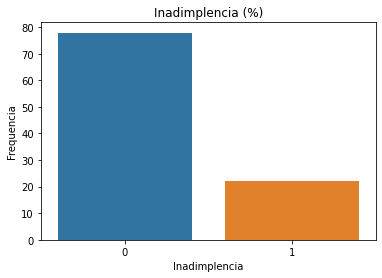

In [21]:
# Inadimplência observada em quantidade
# Dos 30.000 clientes que tomaram crédito, 77,88% pagaram e 22,12% ficaram inadimplentes
# Essa taxa de inadimplência é bastante elevada para um produto de crédito como cartão
# e típica de cenários de crise econômica (como é o caso)
print (df_input['Inadimplente'].value_counts(dropna=False, normalize=True))

ax = sns.barplot(x='Inadimplente', y='Inadimplente', data=df_input, estimator=lambda x: len(x) / len(df_input) * 100)
plt.title('Inadimplencia (%)')
ax.set(xlabel='Inadimplencia Total')
plt.xlabel('Inadimplencia')
plt.ylabel('Frequencia')
plt.show()

In [22]:
# Valor total em atraso que não será pago
valor_pago = df_input.query('Inadimplente == 1')['Atraso'].sum()
porcentagem_valor_inadimplente = 100 * valor_pago / valor_atraso_total
porcentagem_valor_inadimplente = round(porcentagem_valor_inadimplente, 2)
print ('Valor:', valor_pago)
print ('Porcentagem do valor:', porcentagem_valor_inadimplente)

Valor: 287694882.0
Porcentagem do valor: 22.37


In [23]:
# Valor total em atraso que será pago
valor_nao_pago = df_input.query('Inadimplente == 0')['Atraso'].sum()
porcentagem_valor_inadimplente = 100 * valor_nao_pago / valor_atraso_total
porcentagem_valor_inadimplente = round(porcentagem_valor_inadimplente, 2)
print ('Valor:', valor_nao_pago)
print ('Porcentagem do valor:', porcentagem_valor_inadimplente)

Valor: 998640622.62
Porcentagem do valor: 77.63


In [24]:
# Valor total do limite de crédito dos clientes que ficaram inadimplentes
valor_inadimplente = df_input.query('Inadimplente == 1')['Valor'].sum()
porcentagem_valor_inadimplente = 100 * valor_inadimplente / valor_total
porcentagem_valor_inadimplente = round(porcentagem_valor_inadimplente, 2)
print ('Valor:', valor_inadimplente)
print ('Porcentagem do valor:', porcentagem_valor_inadimplente)

Valor: 155413382.4
Porcentagem do valor: 17.18


In [25]:
# Valor total do limite de crédito dos clientes que não ficaram inadimplentes
valor_pago = df_input.query('Inadimplente == 0')['Valor'].sum()
porcentagem_valor_pago = 100 * valor_pago / valor_total
porcentagem_valor_pago = round(porcentagem_valor_pago, 2)
print ('Valor:', valor_pago)
print ('Porcentagem do valor:', porcentagem_valor_pago)

Valor: 749001960.0
Porcentagem do valor: 82.82


Mediana: 25200.0


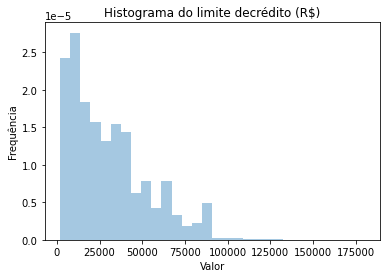

In [26]:
# Histograma do limite do valor crédito do cartão
# o menor limite é R$1.800 e o máximo R$ 180.000, com valor médio R$ 30.147
print ('Mediana:', df_input['Valor'].median())
sns.distplot(df_input['Valor'], bins=30, kde=False, norm_hist=True)
plt.ylabel('Frequência')
plt.title('Histograma do limite decrédito (R$)');

Min: -480872.52
Max: 740894.3999999999
Mediana: 18346.14


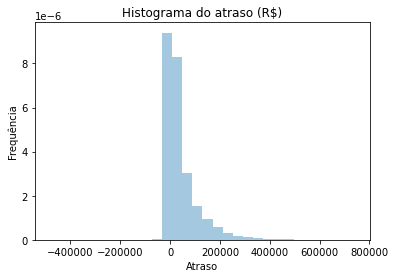

In [27]:
# Histograma do atraso total
# o menor atraso é -480.872 (ou seja, entrou valor para o cliente) e o máximo é R$ 740.894, com mediana em 18.346
print ('Min:', df_input['Atraso'].min())
print ('Max:', df_input['Atraso'].max())
print ('Mediana:', df_input['Atraso'].median())
sns.distplot(df_input['Atraso'], bins=30, kde=False, norm_hist=True)
plt.ylabel('Frequência')
plt.title('Histograma do atraso (R$)');

Min: -60526.62
Max: 947498.94
Mediana: 22735.98


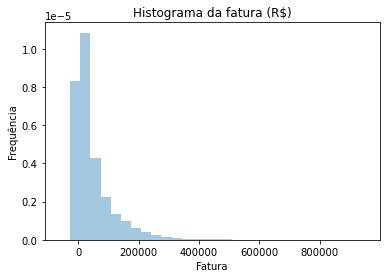

In [28]:
# Histograma da fatura total
# o menor atraso é -60.526 (ou seja, entrou valor para o cliente) e o máximo é R$ 947.498, com mediana em 22.736
print ('Min:', df_input['Fatura'].min())
print ('Max:', df_input['Fatura'].max())
print ('Mediana:', df_input['Fatura'].median())
sns.distplot(df_input['Fatura'], bins=30, kde=False, norm_hist=True)
plt.ylabel('Frequência')
plt.title('Histograma da fatura (R$)');

Mediana: 34.0


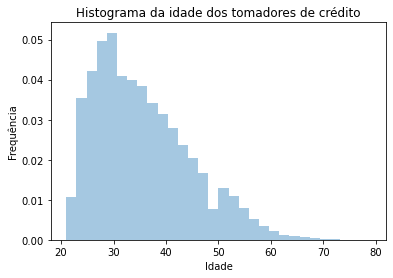

In [29]:
# Histograma da idade
# a idade mínima de um tomador de crédito dessa base é 21 anos e o máximo 79, com idade mediana em 34 anos
print ('Mediana:', df_input['Idade'].median())
sns.distplot(df_input['Idade'], bins=30, kde=False, norm_hist=True)
plt.ylabel('Frequência')
plt.title('Histograma da idade dos tomadores de crédito');

1    0.603733
0    0.396267
Name: Genero, dtype: float64


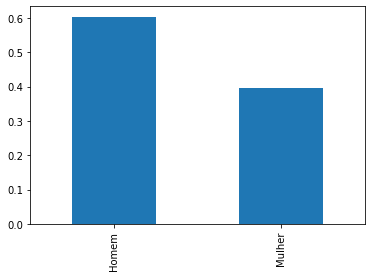

In [30]:
# Genero
# Aproximadamente 60% de homens e 40% de mulheres na base
print (df_input['Genero'].value_counts(dropna=False, normalize=True))
df_plot = df_input['Genero'].value_counts(dropna=False, normalize=True)
df_plot.index = ['Homem', 'Mulher']
df_plot.plot(kind='bar')

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: Grau_Educacao, dtype: float64


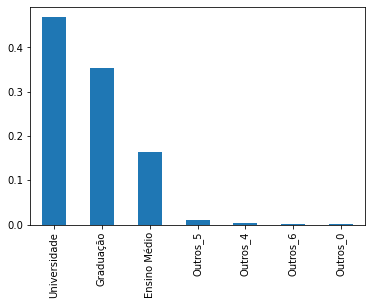

In [31]:
# Escolaridade
# A maior parte do público (~47%) possui diploma de universidade
# 35% possuem graduação e apenas 16% possuem somente o ensino médio concluído
print (df_input['Grau_Educacao'].value_counts(dropna=False, normalize=True))
df_plot = df_input['Grau_Educacao'].value_counts(dropna=False, normalize=True)
df_plot.index = ['Universidade', 'Graduação', 'Ensino Médio', 'Outros_5', 'Outros_4', 'Outros_6', 'Outros_0']
df_plot.plot(kind='bar')

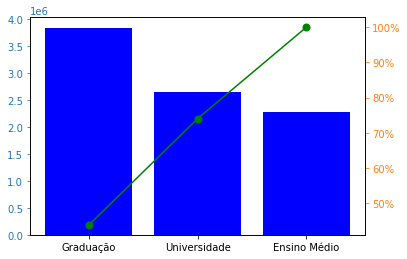

In [32]:
# Diagrama de Pareto do valor limite do cartão de crédito vs. escolaridade
variavel = 'Valor'
df_input_pareto = df_input.copy()
df_input_pareto = df_input_pareto.loc[df_input_pareto['Grau_Educacao'].isin([1, 2, 3])]
df_input_pareto = pd.DataFrame(100*df_input_pareto.groupby('Grau_Educacao')[variavel].mean().
                               sort_values(ascending=False))
df_input_pareto.index = ['Graduação', 'Universidade', 'Ensino Médio']

df_input_pareto["cumpercentage"] = (100*df_input_pareto[variavel].cumsum()/
                                    df_input_pareto[variavel].sum())

fig, ax = plt.subplots()
ax.bar(df_input_pareto.index, df_input_pareto[variavel], color="blue")
ax2 = ax.twinx()
ax2.plot(df_input_pareto.index, df_input_pareto["cumpercentage"], color="green", marker="o", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: Estado_Civil, dtype: float64


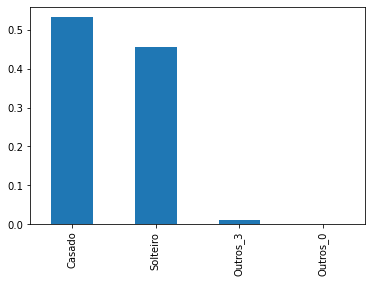

In [33]:
# Estado Civil
# A maior parte do público (53%) é solteira, 45% é casada e apenas 1% tem status outros (divorciado, viúvo, etc)
print (df_input['Estado_Civil'].value_counts(dropna=False, normalize=True))
df_plot = df_input['Estado_Civil'].value_counts(dropna=False, normalize=True)
df_plot.index = ['Casado', 'Solteiro', 'Outros_3', 'Outros_0']
df_plot.plot(kind='bar')

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: Estado_Civil, dtype: float64


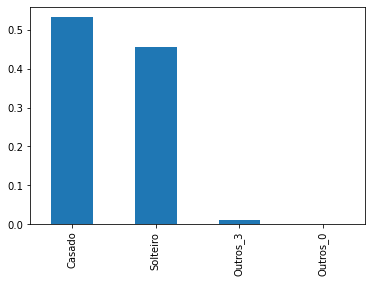

In [34]:
# Estado Civil
# A maior parte do público (53%) é solteira, 45% é casada e apenas 1% tem status outros (divorciado, viúvo, etc)
print (df_input['Estado_Civil'].value_counts(dropna=False, normalize=True))
df_plot = df_input['Estado_Civil'].value_counts(dropna=False, normalize=True)
df_plot.index = ['Casado', 'Solteiro', 'Outros_3', 'Outros_0']
df_plot.plot(kind='bar')

Genero
0    0.241672
1    0.207763
Name: Inadimplente, dtype: float64


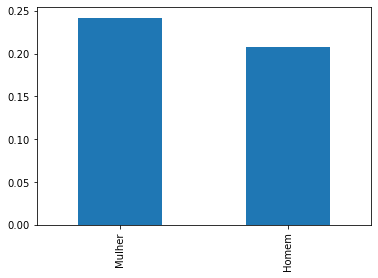

In [35]:
# Inadimplência média em quantidade de cada gênero
# 20% dos homens ficou inadimplente, enquanto a taxa foi maior para as mulheres (24%)
print (df_input.groupby('Genero')['Inadimplente'].mean())

df_plot = df_input.groupby('Genero')['Inadimplente'].mean()
df_plot.index = ['Mulher', 'Homem']
df_plot.plot(kind='bar')

Genero
0    65105582.4
1    90307800.0
Name: Valor, dtype: float64


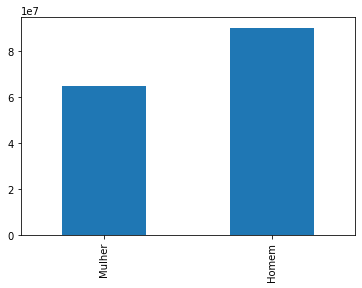

In [36]:
# O valor do limite é muito maior para os homens
# O que faz total sentido, pois 60% dos tomadores são homens
df_valor_total_inadimplente_genero = df_input.query('Inadimplente == 1').groupby('Genero')['Valor'].sum()
print (df_valor_total_inadimplente_genero)

df_plot = df_valor_total_inadimplente_genero.copy()
df_plot.index = ['Mulher', 'Homem']
df_plot.plot(kind='bar')

In [37]:
# Dado isso, será que o gênero importa para a previsão do atraso (ou seja, estão correlacionados) ?
# Existe uma correlação, mas ele é bem pequena (próxima de 0)
df_corr = pd.DataFrame(df_input[['Genero', 'Inadimplente']].corr(method='pearson')['Inadimplente'])
df_corr['abs_Inadimplente'] = np.abs(df_corr['Inadimplente'])
df_corr = df_corr.sort_values(by='abs_Inadimplente', ascending=False)
df_corr = df_corr[['abs_Inadimplente']].iloc[1:]
df_corr.columns = ['correlacao_pearson_inadimplencia']
df_corr

correlacao_pearson_inadimplencia
Genero                          0.039961

Mediana do atraso dos homens: 17351.28
Mediana do atraso das mulheres: 19432.08


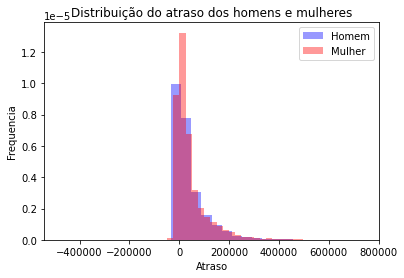

In [38]:
# Histogramas da idade dos tomadores de crédito homens e mulheres
# As distribuições possuem algumas diferenças
# as mulheres tomadoras de crédito são um pouco mais velhas que os homens
print ('Mediana do atraso dos homens:', df_input.query('Genero == 1')['Atraso'].median())
print ('Mediana do atraso das mulheres:', df_input.query('Genero == 0')['Atraso'].median())
sns.distplot(df_input.query('Genero == 1')['Atraso'], bins=30, label='Homem', color='blue', kde=False, norm_hist=True)
sns.distplot(df_input.query('Genero == 0')['Atraso'], bins=30, label='Mulher', color='red', kde=False, norm_hist=True)
plt.xlabel('Atraso')
plt.ylabel('Frequencia')
plt.title('Distribuição do atraso dos homens e mulheres')
plt.legend()

Mediana da fatura dos homens: 21883.14
Mediana da fatura das mulheres: 23802.479999999996


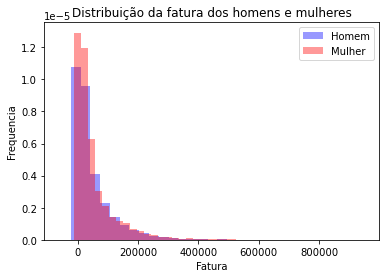

In [39]:
# Histogramas da idade dos tomadores de crédito homens e mulheres
# As distribuições possuem algumas diferenças
# as mulheres tomadoras de crédito são um pouco mais velhas que os homens
print ('Mediana da fatura dos homens:', df_input.query('Genero == 1')['Fatura'].median())
print ('Mediana da fatura das mulheres:', df_input.query('Genero == 0')['Fatura'].median())
sns.distplot(df_input.query('Genero == 1')['Fatura'], bins=30, label='Homem', color='blue', kde=False, norm_hist=True)
sns.distplot(df_input.query('Genero == 0')['Fatura'], bins=30, label='Mulher', color='red', kde=False, norm_hist=True)
plt.xlabel('Fatura')
plt.ylabel('Frequencia')
plt.title('Distribuição da fatura dos homens e mulheres')
plt.legend()

Mediana da idade dos homens: 33.0
Mediana da idade das mulheres: 35.0


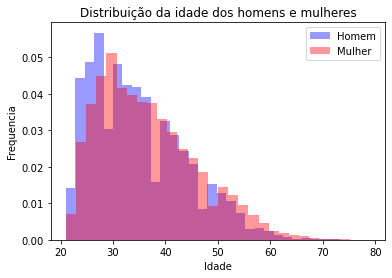

In [40]:
# Histogramas da idade dos tomadores de crédito homens e mulheres
# As distribuições possuem algumas diferenças
# as mulheres tomadoras de crédito são um pouco mais velhas que os homens
print ('Mediana da idade dos homens:', df_input.query('Genero == 1')['Idade'].median())
print ('Mediana da idade das mulheres:', df_input.query('Genero == 0')['Idade'].median())
sns.distplot(df_input.query('Genero == 1')['Idade'], bins=30, label='Homem', color='blue', kde=False, norm_hist=True)
sns.distplot(df_input.query('Genero == 0')['Idade'], bins=30, label='Mulher', color='red', kde=False, norm_hist=True)
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.title('Distribuição da idade dos homens e mulheres')
plt.legend()

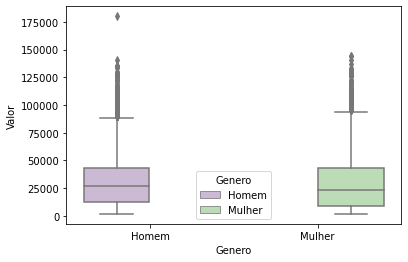

In [41]:
# Boxplot dos limites de crédito dos homens e mulheres
# O limite de crédito dos homens é um pouco maior que o das mulheres
# Além disso, o maior valor limite é de um homem
df_plot = df_input.copy()
df_plot['Genero'] = ['Homem' if x==1 else 'Mulher' for x in df_plot['Genero'].tolist()]
sns.boxplot(x="Genero", y="Valor", hue="Genero", data=df_plot, palette="PRGn", showfliers=True);

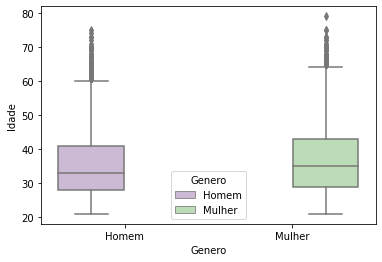

In [42]:
# Boxplot da idade dos homens e mulheres
# As distribuições são claramente diferentes, onde as mulheres tomadores de crédito são, na média, mais velhas
df_plot = df_input.copy()
df_plot['Genero'] = ['Homem' if x==1 else 'Mulher' for x in df_plot['Genero'].tolist()]
sns.boxplot(x="Genero", y="Idade", hue="Genero", data=df_plot, palette="PRGn", showfliers=True);

In [43]:
# Será que a idade dos tomadores de crédito homens e mulheres é diferente?
# Um p valor tão pequeno indica que não podemos aceitar a hipótese nula (de que as amostras são da mesma distribuição)
# e devemos aceitar a hipótese alternativa, de que a idade desses públicos é, de fato, diferente
idade_homens = df_input.query('Genero == 1')['Idade'].values.tolist()
idade_mulheres = df_input.query('Genero == 0')['Idade'].values.tolist()

_, pvalue = stats.ks_2samp(idade_homens, idade_mulheres)
print ('p valor:', pvalue)

p valor: 1.8564769658035902e-34


Mediana do valor dos bons pagadores: 16200.0
Mediana do valor dos maus pagadores: 27000.0


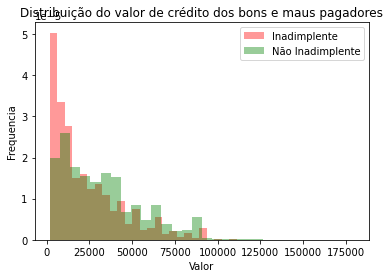

In [44]:
# Hisrogramas do valor tomado em crédito dos bons e maus pagadores (inadimplentes vs. não inadimplentes)
# Clientes inadimplentes tem limites menores (16.200 vs. 27.000)
# Isso é um trigger bem grande para a existência de um viés na concessão
# Provavelmente já existe uma política de concessão, de forma que ela não foi aleatória
# Clientes identificados como bons pagadores possuem limites de crédito maiores
# Uma análise mais minuciosa necessitaria de inferência dos negados para a etapa de modelagem do problema
print ('Mediana do valor dos bons pagadores:', df_input.query('Inadimplente == 1')['Valor'].median())
print ('Mediana do valor dos maus pagadores:', df_input.query('Inadimplente == 0')['Valor'].median())

sns.distplot(df_input.query('Inadimplente == 1')['Valor'], bins=30, label='Inadimplente',
                                                           color='red', kde=False, norm_hist=True)

sns.distplot(df_input.query('Inadimplente == 0')['Valor'], bins=30, label='Não Inadimplente',
                                                           color='green', kde=False, norm_hist=True)
plt.xlabel('Valor')
plt.ylabel('Frequencia')
plt.title('Distribuição do valor de crédito dos bons e maus pagadores')
plt.legend()

In [45]:
# Será que o valor limite de crédito dos bons e maus pagadores é diferente?
# Um p valor tão pequeno indica que não podemos aceitar a hipótese nula (de que as amostras são da mesma distribuição)
# e devemos aceitar a hipótese alternativa, de que os valores limites são, de fato, diferentes
valores_bons = df_input.query('Inadimplente == 0')['Valor'].values.tolist()
valores_maus = df_input.query('Inadimplente == 1')['Valor'].values.tolist()

_, pvalue = stats.ks_2samp(valores_bons, valores_maus)
print ('p valor:', pvalue)

p valor: 6.9814516393834235e-149


Mediana dos bons pagadores: 34.0
Mediana dos maus pagadores: 34.0


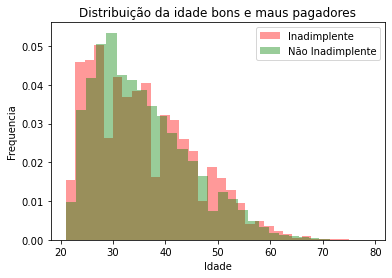

In [46]:
# Histogramas da idade dos bons e maus pagadores (inadimplentes vs. não inadimplentes)
# O centro das distribuições é muito parecido (ambos 34 anos)
# Mas, em geral, os inadimplentes possuem uma idade menor
# Isso acontece bastante na prática do mundo de crédito
# Clientes jovens possuem, em geral, taxas de inadimplência mais elevadas
# O mesmo acontece para clientes pouco bancarizados e/ou com pouco tempo de relacionamento
print ('Mediana dos bons pagadores:', df_input.query('Inadimplente == 1')['Idade'].median())
print ('Mediana dos maus pagadores:', df_input.query('Inadimplente == 0')['Idade'].median())

sns.distplot(df_input.query('Inadimplente == 1')['Idade'], bins=30, label='Inadimplente',
                                                           color='red', kde=False, norm_hist=True)

sns.distplot(df_input.query('Inadimplente == 0')['Idade'], bins=30, label='Não Inadimplente',
                                                           color='green', kde=False, norm_hist=True)
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.title('Distribuição da idade bons e maus pagadores')
plt.legend()

In [47]:
df_input.groupby(['Grau_Educacao'])['Inadimplente'].sum()/df_input.groupby(['Grau_Educacao'])['Inadimplente'].count()*100

Grau_Educacao
0     0.000000
1    19.234766
2    23.734854
3    25.157616
4     5.691057
5     6.428571
6    15.686275
Name: Inadimplente, dtype: float64

               Inadimplente
Grau_Educacao              
0                  0.000000
1                  0.192348
2                  0.237349
3                  0.251576
4                  0.056911
5                  0.064286
6                  0.156863
*****
Inadimplencia média dos com graduação: 0.19234766178554558
Inadimplencia média dos que fizeram universidade: 0.23734853884533144
Inadimplencia média dos com apenas ensino médio: 0.2515761643278422


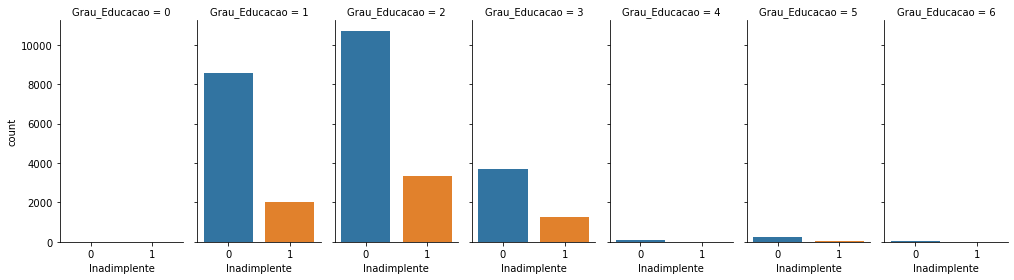

In [48]:
# Através do gráfico abaixo é possível observar que a escolaridade explica bastante a inadimplência
# Pessoas com universidade e graduação possuem inadimplências muito menores do que o público com somente ensino médio
# Isso acontece muito na prática, e é ainda mais acentuado no Brasil onde a desigualdade social é maior
# Por isso a escolaridade do cliente está presente em grande parte dos modelos de crédito do mercado
print (df_input[['Grau_Educacao', 'Inadimplente']].groupby(['Grau_Educacao']).mean())
print ('*****')
print ('Inadimplencia média dos com graduação:', df_input.query('Grau_Educacao == 1')['Inadimplente'].mean())
print ('Inadimplencia média dos que fizeram universidade:', df_input.query('Grau_Educacao == 2')['Inadimplente'].mean())
print ('Inadimplencia média dos com apenas ensino médio:', df_input.query('Grau_Educacao == 3')['Inadimplente'].mean())
sns.factorplot('Inadimplente', col='Grau_Educacao', data=df_input, kind='count', size=4, aspect=.5);

In [49]:
# Dado isso, será que existe uma correlação estar casado/solteiro para a previsão do atraso (ou seja, estão correlacionados) ?
# Existe de fato uma pequena correlação entre ter graduação vs. ter somente o ensino médio e a inadimplência observada
df_corr = df_input.loc[df_input['Grau_Educacao'].isin([1, 3])].copy()
df_corr['Grau_Educacao'] = (df_corr['Grau_Educacao'] == 1)
df_corr = pd.DataFrame(df_corr[['Grau_Educacao', 'Inadimplente']].corr(method='pearson')['Inadimplente'])
df_corr['abs_Inadimplente'] = np.abs(df_corr['Inadimplente'])
df_corr = df_corr.sort_values(by='abs_Inadimplente', ascending=False)
df_corr = df_corr[['abs_Inadimplente']].iloc[1:]
df_corr.columns = ['correlacao_pearson_inadimplencia']
df_corr

correlacao_pearson_inadimplencia
Grau_Educacao                          0.067539

              Inadimplente
Estado_Civil              
0                 0.092593
1                 0.234717
2                 0.209283
3                 0.260062
*****
Inadimplencia média dos casados: 0.23471703638626545
Inadimplencia média dos solteiros: 0.20928338762214985


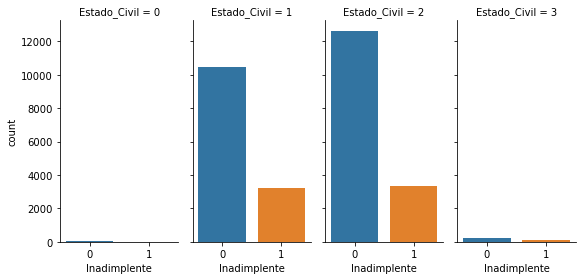

In [50]:
# Através do gráfico abaixo é possível observar que o estado civil também explica bem a inadimplência
# Pessoas casadas possuem uma inadimplência maior do que as solteiras
# Isso nem sempre é verdade na prática, por isso a quantidade de dependentes é uma boa variável auxiliar
print (df_input[['Estado_Civil', 'Inadimplente']].groupby(['Estado_Civil']).mean())
print ('*****')
print ('Inadimplencia média dos casados:', df_input.query('Estado_Civil == 1')['Inadimplente'].mean())
print ('Inadimplencia média dos solteiros:', df_input.query('Estado_Civil == 2')['Inadimplente'].mean())
sns.factorplot('Inadimplente', col='Estado_Civil', data=df_input, kind='count', size=4, aspect=.5);

In [51]:
# Dado isso, será que existe uma correlação estar casado/solteiro para a previsão do atraso (ou seja, estão correlacionados) ?
# Existe de fato uma correlação entre o estado civil e a inadimplência observada
df_corr = df_input.loc[df_input['Estado_Civil'].isin([1, 2])].copy()
df_corr['Estado_Civil'] = (df_corr['Estado_Civil'] == 1)
df_corr = pd.DataFrame(df_corr[['Estado_Civil', 'Inadimplente']].corr(method='pearson')['Inadimplente'])
df_corr['abs_Inadimplente'] = np.abs(df_corr['Inadimplente'])
df_corr = df_corr.sort_values(by='abs_Inadimplente', ascending=False)
df_corr = df_corr[['abs_Inadimplente']].iloc[1:]
df_corr.columns = ['correlacao_pearson_inadimplencia']
df_corr

correlacao_pearson_inadimplencia
Estado_Civil                          0.030555

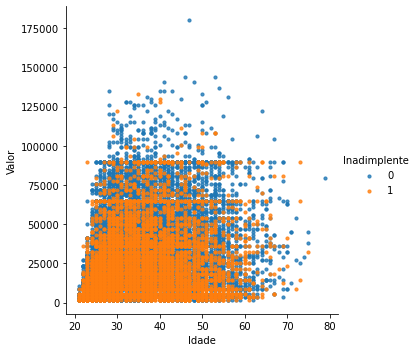

In [52]:
# Distribuição da idade vs. valor para bons e paus pagadores
# Clientes mais jovens e com menor valor tem maiores taxas de inadimplência
sns.lmplot('Idade',
           'Valor',
           data=df_input,
           fit_reg=False,
           hue="Inadimplente",
           scatter_kws={"marker": ".", "s": 10});

In [53]:
# Status dos pagamentos
# A inadimplência é maior conforme aumenta o atraso da fatura
# Para pagamentos em dia, a inadimplência é menor que 20%
# Enquanto para atrasos de 8 meses a inadimplência média a mais de 50%
print (df_input[['Status_Pagamento_1', 'Inadimplente']].groupby(['Status_Pagamento_1']).mean())

                    Inadimplente
Status_Pagamento_1              
-2                      0.132294
-1                      0.167781
 0                      0.128113
 1                      0.339479
 2                      0.691414
 3                      0.757764
 4                      0.684211
 5                      0.500000
 6                      0.545455
 7                      0.777778
 8                      0.578947


Text(0.5, 0, 'Quintil do pagamento de conta')

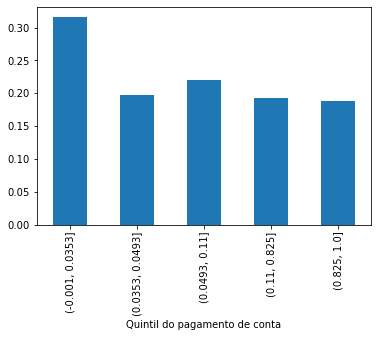

In [54]:
# Pagamento da fatura do mês vs. Inadimplencia
# Porcentagem menores dos valores pagos das faturas implicam em inadimplências maiores, como era de se esperar 
df_input_cut = df_input.query('Pagamento_Conta_1 <= 1').copy()
df_cut = pd.qcut(df_input_cut['Pagamento_Conta_1'], q=5)
df_input_cut['qcut'] = df_cut.values.tolist()
df_input_cut.groupby('qcut')['Inadimplente'].mean().plot(kind='bar')
plt.xlabel('Quintil do pagamento de conta')

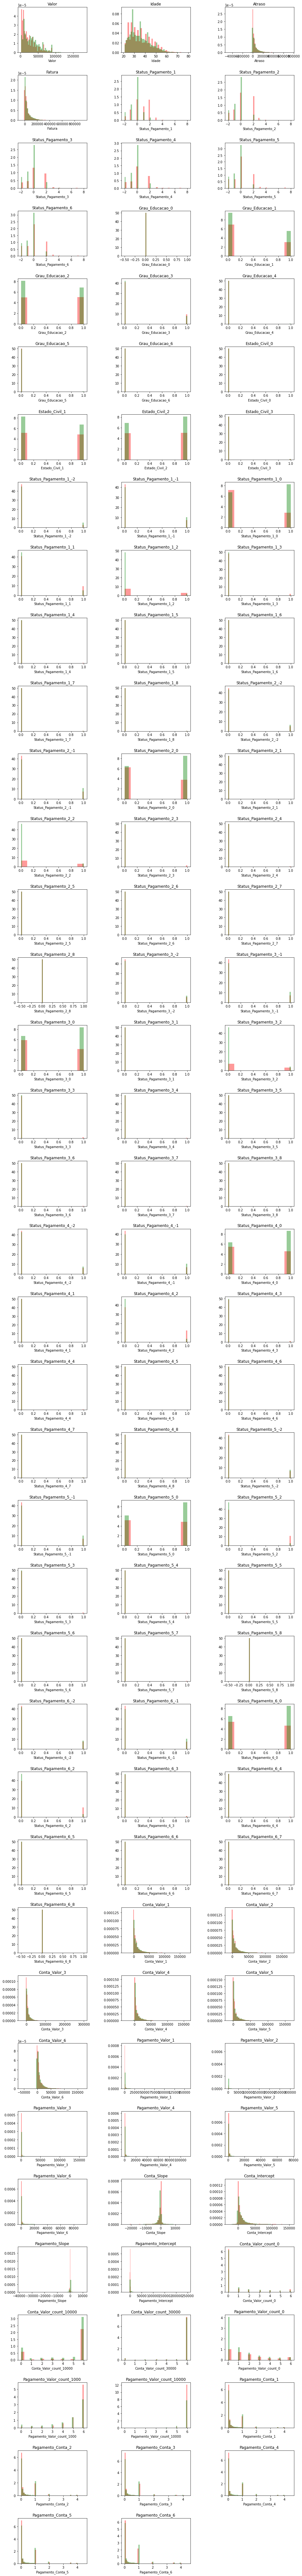

In [55]:
# Histogramas dos bons e maus pagadores para cada variável explicativa candidata
# Variáveis onde a separação é mais evidente, são variáveis explicativas interessantes para o modelo
# Caso fosse de interesse, seria possível computar o Ks de cada par de distribuições
# como forma de seleção de variáveis explicativas fortes
# Algumas variáveis onde a separação é evidente:
# Alguns dos Status de Pagamentos
# Grau escolaridade 1 (tem graduação)
# Grau escolaridade 2 (tem universidade)
# Grau escolaridade 3 (tem ensino médio)
# Algumas das variáveis criadas: pagamento de faturas, quantidade de faturas pagas, variáveis de slope e intercept

# Alguns pontos de inadimplencia clara:
# Status_Pagamento_1 e Status_Pagamento_2 maior ou igual a 2
# Pagamento_valor_count_0 >= 1
# Valores de crédito baixo

plt.figure()
gs = GridSpec(41, 3, bottom=200, top=230, left=200, right=202, wspace=0.5, hspace=0.5)
for i, cn in enumerate(lista_colunas_corr):
    ax = plt.subplot(gs[i])
    sns.distplot(df_input[cn][df_input.Inadimplente == 1], kde=False, norm_hist=True, color='red')
    sns.distplot(df_input[cn][df_input.Inadimplente == 0], kde=False, norm_hist=True, color='green')
    ax.set_label('')
    ax.set_title(str(cn))
plt.show()

In [56]:
# correlação entre as variáveis explicativas candidatas e a inadimplência observada
# O status dos pagamentos são variáveis muito correlacionadas ao target de inadimplência
# Como esperado, as variáveis criadas de slope e intercept ficaram boas também
# As variáveis de porcentagem do pagamento também ficaram boas
# Algumas das variáveis dummy de escolaridade e estado civil ficaram boas, outras menos
# O valor tem uma correlação interessante, como haviámos imaginado antes pelas análises gráficas
# A idade não foi tão importante assim, mas ainda assim tem uma correlação, o que pode ajudar no modelo futuramente

df_corr = pd.DataFrame(df_input[lista_colunas_corr + ['Inadimplente']].corr(method='pearson')['Inadimplente'])
df_corr['abs_Inadimplente'] = np.abs(df_corr['Inadimplente'])
df_corr = df_corr.sort_values(by='abs_Inadimplente', ascending=False)
df_corr = df_corr[['abs_Inadimplente']].iloc[1:]
df_corr.columns = ['correlacao_pearson_inadimplencia']
df_corr.head(30)

correlacao_pearson_inadimplencia
Status_Pagamento_1_2                                0.353881
Status_Pagamento_1                                  0.324794
Status_Pagamento_2_2                                0.313191
Status_Pagamento_3_2                                0.270885
Status_Pagamento_2                                  0.263551
Status_Pagamento_4_2                                0.249674
Status_Pagamento_5_2                                0.239308
Status_Pagamento_3                                  0.235253
Status_Pagamento_1_0                                0.220378
Status_Pagamento_6_2                                0.219068
Status_Pagamento_4                                  0.216614
Status_Pagamento_5                                  0.204149
Status_Pagamento_6                                  0.186866
Pagamento_Valor_count_0                             0.163391
Status_Pagamento_2_0                                0.157029
Valor                                               0.153520
Status_Pagamento_1_3                                0.134656
Pagamento_Valor_count_1000                          0.127192
Status_Pagamento_3_0                                0.118370
Status_Pagamento_1_1                                0.106690
Status_Pagamento_4_0                                0.100678
Status_Pagamento_2_3                                0.099842
Status_Pagamento_5_0                                0.089691
Status_Pagamento_6_0                                0.086002
Status_Pagamento_6_3                                0.079513
Status_Pagamento_3_-1                               0.078102
Status_Pagamento_5_3                                0.076993
Status_Pagamento_3_3                                0.076549
Status_Pagamento_2_-1                               0.074509
Status_Pagamento_4_3                                0.072986

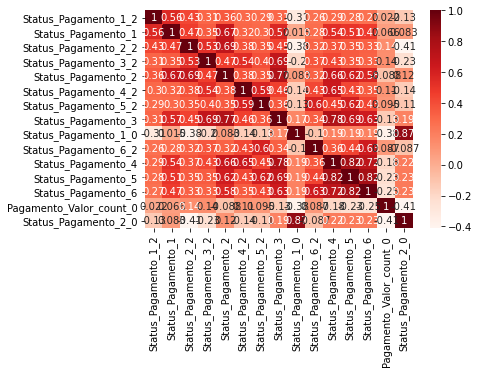

Status_Pagamento_1_2  Status_Pagamento_1  Status_Pagamento_2_2  Status_Pagamento_3_2  Status_Pagamento_2  Status_Pagamento_4_2  Status_Pagamento_5_2  Status_Pagamento_3  Status_Pagamento_1_0  Status_Pagamento_6_2  Status_Pagamento_4  Status_Pagamento_5  Status_Pagamento_6  Pagamento_Valor_count_0  Status_Pagamento_2_0
Status_Pagamento_1_2                 1.000000            0.560566              0.431244              0.313970            0.360201              0.301516              0.285354            0.310242             -0.306939              0.263998            0.291779            0.280410            0.266781                 0.022140             -0.125095
Status_Pagamento_1                   0.560566            1.000000              0.469480              0.348472            0.672164              0.316463              0.298475            0.574245              0.014602              0.280019            0.538841            0.509426            0.474553                 0.066366              0.082717
Status_Pagamento_2_2                 0.431244            0.469480              1.000000              0.534324            0.691715              0.384594              0.352574            0.448589             -0.381346              0.321077            0.368517            0.351063            0.328126                 0.144349             -0.407462
Status_Pagamento_3_2                 0.313970            0.348472              0.534324              1.000000            0.467460              0.540165              0.398703            0.691260             -0.203650              0.368454            0.431444            0.351220            0.325486                 0.138092             -0.233380
Status_Pagamento_2                   0.360201            0.672164              0.691715              0.467460            1.000000              0.375333              0.351353            0.766552              0.083171              0.323469            0.662067            0.622780            0.575501                -0.087998              0.117313
Status_Pagamento_4_2                 0.301516            0.316463              0.384594              0.540165            0.375333              1.000000              0.587342            0.456775             -0.142244              0.425578            0.651629            0.427232            0.345221                 0.110001             -0.137295
Status_Pagamento_5_2                 0.285354            0.298475              0.352574              0.398703            0.351353              0.587342              1.000000            0.363486             -0.125273              0.595170            0.450699            0.619415            0.428662                 0.095279             -0.109324
Status_Pagamento_3                   0.310242            0.574245              0.448589              0.691260            0.766552              0.456775              0.363486            1.000000              0.168596              0.337678            0.777359            0.686775            0.632684                -0.133646              0.187622
Status_Pagamento_1_0                -0.306939            0.014602             -0.381346             -0.203650            0.083171             -0.142244             -0.125273            0.168596              1.000000             -0.100428            0.191853            0.189527            0.193307                -0.379370              0.872087
Status_Pagamento_6_2                 0.263998            0.280019              0.321077              0.368454            0.323469              0.425578              0.595170            0.337678             -0.100428              1.000000            0.358957            0.441717            0.634934                 0.086760             -0.086817
Status_Pagamento_4                   0.291779            0.538841              0.368517              0.431444            0.662067              0.651629              0.450699            0.777359              0.191853              0

In [57]:
# Matriz de correlação entre as top15 variáveis mais correlacionadas ao target
# Através desse plot, é possível ver que as variáveis booleanas de status de pagamentos são muito correlacionadas
# como já era de se esperar

df_corr = pd.DataFrame(df_input[df_corr.iloc[:15, :]['correlacao_pearson_inadimplencia'].index.tolist()]
                       .corr(method='pearson'))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.Reds)
plt.show()
df_corr

### 2.2) Comunicação para Governança de Dados

##### 1) O que significam valores negativos de faturas acumuladas?

In [58]:
# Embora possa fazer sentido dentro da dinâmica de pagamentos e atrasos
# Seria interessante ter mais informações sobre isso nese domínio de problema
df_input.loc[df_input['Fatura'] < 0, 'Fatura'].head()

26       -70.92
109     -111.24
173    -2082.42
216    -1021.68
290   -60526.62
Name: Fatura, dtype: float64

##### 2) Por que a distribuição da idade não é a mesma ao longo da base?

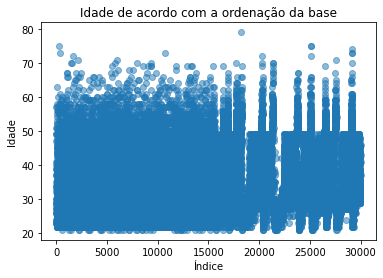

In [59]:
# Por que a partir de um determinado índice a distribuição da idade muda?
# Isso é devido a alguma informação temporal que não foi informada?
# ou um viés de amostragem do público?
# Além disso, por que não exisem pessoas com idade entre 18 e 20 e com mais de 80 anos na base?
# É uma questão de legislação do país ou viés na política atual de concessão de crédito?

plt.scatter(df_input.index, df_input['Idade'], alpha=0.5)
plt.title('Idade de acordo com a ordenação da base')
plt.xlabel('Índice')
plt.ylabel('Idade')
plt.show()

##### 3) O que significam as escolaridades com valor 0, 5 e 6?

In [60]:
# Existem valores de escolaridade que não foram reportados no domínio do problema
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
# Então o que significam os valores 0, 5 e 6?
# Seria 0 um tipo de missing?
# Seria interessante ter mais esclarecimentos sobre isso

df_input['Grau_Educacao'].value_counts(dropna=False, normalize=True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: Grau_Educacao, dtype: float64

##### 4) O que significa o valor de estado civil 0?

In [61]:
# O estado civil informado pelos metadados da base possui o domínio:
# 1 = married; 2 = single; 3 = others
# Então o que significa o valor 0?
# Seria 0 um tipo de missing?
# Seria interessante ter mais esclarecimentos sobre isso

df_input['Estado_Civil'].value_counts(dropna=False, normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: Estado_Civil, dtype: float64

##### 5) O que significam os valores de status de pagamento 0 e -2?

In [62]:
# Existem valores de status de pagamento que não foram reportados no domínio do problema
# O status de pagamento informado pelos metadados da base possui o domínio:
# -1 = pay duly
# 1 = payment delay for one month
# 2 = payment delay for two months
# ...
# 8 = payment delay for eight months
# 9 = payment delay for nine months and above

# Então o que significam os valores 0 e -2?
# Seria 0 um tipo de missing?
# Seria interessante ter mais esclarecimentos sobre isso

print (df_input['Status_Pagamento_1'].value_counts(dropna=False, normalize=True))

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: Status_Pagamento_1, dtype: float64


##### 6) Existem clientes duplicados nessa base?

In [63]:
# Existem clientes duplicados nessa base? (mais de um crédito no período analisado)
# Existem clientes muito parecidos (como o exemplo abaixo)
# Isso é somente uma coincidência ou foram dois produtos de crédito solicitado pela mesma pessoa?
# Esse tipo de questionamento é importante para a modelagem, para garantir que não haja data leak do treino para o teste
# E testar com um cliente que já apareceu no treino trás problemas de viés e erro subestimado
df_input.iloc[[7132, 29827], :]

Valor  Genero  Grau_Educacao  Estado_Civil  Idade  Status_Pagamento_1  Status_Pagamento_2  Status_Pagamento_3  Status_Pagamento_4  Status_Pagamento_5  Status_Pagamento_6  Conta_Valor_1  Conta_Valor_2  Conta_Valor_3  Conta_Valor_4  Conta_Valor_5  Conta_Valor_6  Pagamento_Valor_1  Pagamento_Valor_2  Pagamento_Valor_3  Pagamento_Valor_4  Pagamento_Valor_5  Pagamento_Valor_6  Inadimplente     Fatura     Atraso  Conta_Slope  Conta_Intercept  Pagamento_Slope  Pagamento_Intercept  Conta_Valor_count_0  Conta_Valor_count_10000  Conta_Valor_count_30000  Pagamento_Valor_count_0  Pagamento_Valor_count_1000  Pagamento_Valor_count_10000  Pagamento_Conta_1  Pagamento_Conta_2  Pagamento_Conta_3  Pagamento_Conta_4  Pagamento_Conta_5  Pagamento_Conta_6  Grau_Educacao_0  Grau_Educacao_1  Grau_Educacao_2  Grau_Educacao_3  Grau_Educacao_4  Grau_Educacao_5  Grau_Educacao_6  Estado_Civil_0  Estado_Civil_1  Estado_Civil_2  Estado_Civil_3  Status_Pagamento_1_-2  Status_Pagamento_1_-1  \
7132   27000.0       0              1             1     35                   0                   0                   0                   0                   0                   0       28852.56       27716.58       23350.50        18549.0        9800.46        8449.74             1098.0              918.0              756.0              342.0              288.0              270.0             1  116718.84  113046.84     -4587.54         35509.54          -184.11               1256.4                  0.0                      2.0                      6.0                      0.0                         5.0                          6.0           0.038056           0.033121           0.032376           0.018438           0.029386           0.031954                0                1                0                0                0                0                0               0               1               0               0                      0                      0   
29827  27000.0       0              1             1     35                   2                   0                   0                   0                   0                   0       29779.38       28852.56       27716.58        23350.5       18549.00        9800.46             1314.0             1098.0              918.0              756.0              342.0              288.0             1  138048.48  133332.48     -3862.04         36525.22          -216.00               1542.0                  0.0                      1.0                      6.0                      0.0                         4.0                          6.0           0.044124           0.038056           0.033121           0.032376           0.018438           0.029386                0                1                0                0                0                0                0               0               1               0               0                      0                      0   

       Status_Pagamento_1_0  Status_Pagamento_1_1  Status_Pagamento_1_2  Status_Pagamento_1_3  Status_Pagamento_1_4  Status_Pagamento_1_5  Status_Pagamento_1_6  Status_Pagamento_1_7  Status_Pagamento_1_8  Status_Pagamento_2_-2  Status_Pagamento_2_-1  Status_Pagamento_2_0  Status_Pagamento_2_1  Status_Pagamento_2_2  Status_Pagamento_2_3  Status_Pagamento_2_4  Status_Pagamento_2_5  Status_Pagamento_2_6  Status_Pagamento_2_7  Status_Pagamento_2_8  Status_Pagamento_3_-2  Status_Pagamento_3_-1  Status_Pagamento_3_0  Status_Pagamento_3_1  Status_Pagamento_3_2  Status_Pagamento_3_3  Status_Pagamento_3_4  Status_Pagamento_3_5  Status_Pagamento_3_6  Status_Pagamento_3_7  Status_Pagamento_3_8  Status_Pagamento_4_-2  Status_Pagamento_4_-1  Status_Pagamento_4_0  Status_Pagamento_4_1  Status_Pagamento_4_2  Status_Pagamento_4_3  Status_Pagamento_4_4  Status_Pagamento_4_5  Status_Pagamento_4_6  Status_Pagamento_4_7  Status_Pagamento_4_8  Status_Pagamento_5_-2  Status_Pagamento_5_-1  \
7132                      1                     0                

## 3. Regra de Negócio

### 3.1) Construção da regra de negócio

In [64]:
# top15 variaveis mais correlacionadas com o target de inadimplência
df_corr = pd.DataFrame(df_input[lista_colunas_corr + ['Inadimplente']].corr(method='pearson')['Inadimplente'])
df_corr['abs_Inadimplente'] = np.abs(df_corr['Inadimplente'])
df_corr = df_corr.sort_values(by='abs_Inadimplente', ascending=False)
df_corr = df_corr[['abs_Inadimplente']].iloc[1:]
df_corr.columns = ['correlacao_pearson_inadimplencia']
df_corr.head(15)

correlacao_pearson_inadimplencia
Status_Pagamento_1_2                             0.353881
Status_Pagamento_1                               0.324794
Status_Pagamento_2_2                             0.313191
Status_Pagamento_3_2                             0.270885
Status_Pagamento_2                               0.263551
Status_Pagamento_4_2                             0.249674
Status_Pagamento_5_2                             0.239308
Status_Pagamento_3                               0.235253
Status_Pagamento_1_0                             0.220378
Status_Pagamento_6_2                             0.219068
Status_Pagamento_4                               0.216614
Status_Pagamento_5                               0.204149
Status_Pagamento_6                               0.186866
Pagamento_Valor_count_0                          0.163391
Status_Pagamento_2_0                             0.157029

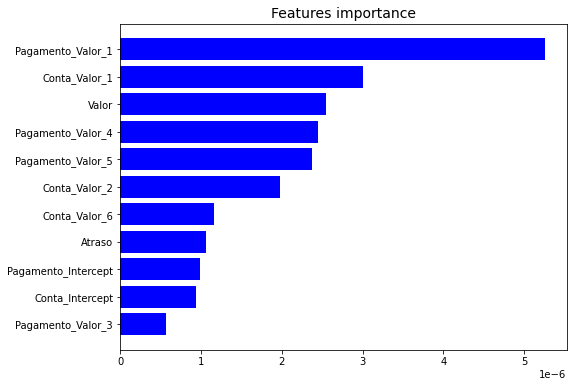

Top 10 vars:


['Pagamento_Valor_1',
 'Conta_Valor_1',
 'Valor',
 'Pagamento_Valor_4',
 'Pagamento_Valor_5',
 'Conta_Valor_2',
 'Conta_Valor_6',
 'Atraso',
 'Pagamento_Intercept',
 'Conta_Intercept']

In [65]:
# Seleção das variáveis mais importantes usando Lasso
# Destacam-se: Pagamento_Valor_1, Conta_Valor_1, Valor
colunas_usar = lista_colunas_train_sem_norm_com_one_hot
df_input_cpy = df_input.copy()
X = df_input_cpy[colunas_usar]
y = df_input_cpy.loc[:, 'Inadimplente']

clf_Lasso = Lasso(alpha=0.5)
clf_Lasso.fit(X, y)
features_importances = abs(clf_Lasso.coef_)

df = HelperClass.plot_feature_importance(colunas_usar, features_importances, 10)

print ('Top 10 vars:')
df['Feature'].values.tolist()[:10]

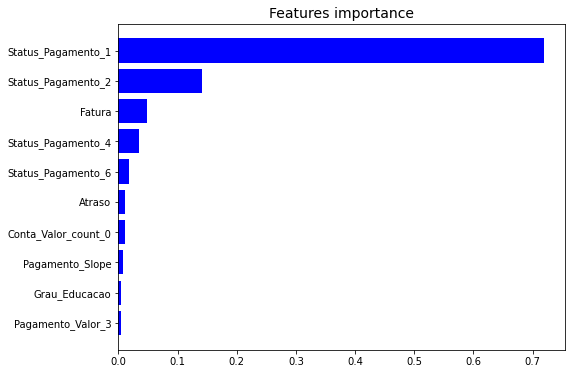

['Status_Pagamento_1', 'Status_Pagamento_2', 'Fatura', 'Status_Pagamento_4', 'Status_Pagamento_6', 'Atraso', 'Conta_Valor_count_0', 'Pagamento_Slope', 'Grau_Educacao', 'Pagamento_Valor_3']


Feature  Feature importance
0   Status_Pagamento_1            0.718495
1   Status_Pagamento_2            0.141875
2               Fatura            0.048875
3   Status_Pagamento_4            0.034910
4   Status_Pagamento_6            0.017836
5               Atraso            0.011644
6  Conta_Valor_count_0            0.011217
7      Pagamento_Slope            0.007521
8        Grau_Educacao            0.004060
9    Pagamento_Valor_3            0.003567

In [66]:
# Seleção das variáveis mais importantes usando árvore de decisão
colunas_usar = lista_colunas_train_sem_norm_com_one_hot
df_input_cpy = df_input.copy()
X = df_input_cpy[colunas_usar]
y = df_input_cpy.loc[:, 'Inadimplente']

clf_Tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_Tree.fit(X, y)

importancias = clf_Tree.feature_importances_
df_importancias = pd.DataFrame({'Feature': colunas_usar, 'Feature_importance': importancias})
df_importancias = df_importancias.sort_values(by='Feature_importance', ascending=False)
colunas_usar = df_importancias['Feature'].values.tolist()[:10]

df_input_cpy = df_input.copy()
X = df_input_cpy[colunas_usar]
y = df_input_cpy.loc[:, 'Inadimplente']

clf_Tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_Tree.fit(X, y)

importancias = clf_Tree.feature_importances_

df = HelperClass.plot_feature_importance(colunas_usar, importancias, 10)
print (df['Feature'].values.tolist())
df

### 3.2) Avaliação da regra de negócio

In [67]:
# Nessa parte do projeto, irei encontrar a melhor regra de negócio e avaliá-la
# que maximiza o lucro, sem me preocupar com modelagem (treino/teste, validação cruzada, etc)
# Minha ideia aqui foi usar as top variáveis pra fazer um brute force tentando otimizar o lucro
# As variáveis que considerei como candidatas (graças à análise exploratória) são:
# Status_Pagamento_1, Status_Pagamento_2, Pagamento_Valor_count_0, Valor

In [68]:
# Caso não ligássemos para ninguém, o lucro seria: R$ -254.262.542 (prejuízo)

df_input['pred_regra_negocio'] = 0

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

print ('Lucro:', lucro)

******************************
Matriz de confusão do público em quantidade:
******************************
Verdadeiro Negativos: 77.88%
Falso Negativos: 22.12%
Verdadeiro Positivos: 0.0%
Falso Positivos: 0.0%
******************************
Matriz de confusão do público em valor atrasado:
******************************
Verdadeiro Negativos: 77.63%
Falso Negativos: 22.37%
Verdadeiro Positivos: 0.0%
Falso Positivos: 0.0%
******************************
Matriz de confusão do público em valor da fatura:
******************************
Verdadeiro Negativos: 78.62%
Falso Negativos: 21.38%
Verdadeiro Positivos: 0.0%
Falso Positivos: 0.0%
******************************
Lucro: -254262542.91


In [69]:
# Caso ligássemos para todos, o lucro seria: -1.021.577.117 (prejuízo)

df_input['pred_regra_negocio'] = 1

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total

lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

print ('Lucro:', lucro)

******************************
Matriz de confusão do público em quantidade:
******************************
Verdadeiro Negativos: 0.0%
Falso Negativos: 0.0%
Verdadeiro Positivos: 22.12%
Falso Positivos: 77.88%
******************************
Matriz de confusão do público em valor atrasado:
******************************
Verdadeiro Negativos: 0.0%
Falso Negativos: 0.0%
Verdadeiro Positivos: 22.37%
Falso Positivos: 77.63%
******************************
Matriz de confusão do público em valor da fatura:
******************************
Verdadeiro Negativos: 0.0%
Falso Negativos: 0.0%
Verdadeiro Positivos: 21.38%
Falso Positivos: 78.62%
******************************
Lucro: -1021577117.14


In [70]:
# Será que utilizando top variáveis explicativas importantes seria possível maximizar o lucro?
# Teste com as variáveis: Status_Pagamento_1 E Valor
# Lucro: -252.473.520 (prejuízo)

maior_lucro = np.NINF
HelperClass.stars()
print ('Otimização do lucro via regra de negócio:')
HelperClass.stars()

for Status_Pagamento_1 in list(range(-2,9)):
    for Valor in list(range(1800,180001,1000)):

        df_input['pred_regra_negocio'] = 0
        filtro = ((df_input['Status_Pagamento_1'] >= Status_Pagamento_1) & (df_input['Valor'] >= Valor))

        df_input.loc[filtro, 'pred_regra_negocio'] = 1

        # Avaliação financeira
        true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
        qtd_true_positive = len(true_positive)
        porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
        porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
        porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

        false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
        qtd_false_positive = len(false_positive)
        porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
        porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
        porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

        true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
        qtd_true_negative = len(true_negative)
        porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
        porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
        porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

        false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
        qtd_false_negative = len(false_negative)
        porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
        porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
        porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


        lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                          porcentagem_fatura_valor_true_negative,
                                          porcentagem_fatura_valor_false_negative,
                                          porcentagem_fatura_valor_false_positive,
                                          porcentagem_fatura_valor_true_positive,
                                          qtd_true_positive, qtd_false_positive)

        if (lucro > maior_lucro):
            maior_lucro = lucro
            Status_Pagamento_1_melhor_lucro = Status_Pagamento_1
            Valor_melhor_lucro = Valor
            print ('Melhor lucro atualmente:', lucro)
            print ('Parametros:', Status_Pagamento_1, Valor)
            print ('******')


df_input['pred_regra_negocio'] = 0
filtro = ((df_input['Status_Pagamento_1'] >= Status_Pagamento_1_melhor_lucro) & (df_input['Valor'] >= Valor_melhor_lucro))
df_input.loc[filtro, 'pred_regra_negocio'] = 1

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

quantidade_ligacoes = len(df_input.query('pred_regra_negocio == 1'))
porcentagem_ligacoes = round((100*quantidade_ligacoes/len(df_input)),2)
print ('Lucro da regra de negócio:', lucro)
print ('Quantidade de ligações: {}'.format(quantidade_ligacoes))
print ('Porcentagem de ligações: {}%'.format(porcentagem_ligacoes))

******************************
Otimização do lucro via regra de negócio:
******************************
Melhor lucro atualmente: -1021577117.14
Parametros: -2 1800
******
Melhor lucro atualmente: -1020298456.29
Parametros: -2 2800
******
Melhor lucro atualmente: -1010064539.16
Parametros: -2 3800
******
Melhor lucro atualmente: -998217805.85
Parametros: -2 5800
******
Melhor lucro atualmente: -996479390.9
Parametros: -2 7800
******
Melhor lucro atualmente: -954379260.64
Parametros: -2 9800
******
Melhor lucro atualmente: -941513773.23
Parametros: -2 11800
******
Melhor lucro atualmente: -928189204.39
Parametros: -2 12800
******
Melhor lucro atualmente: -899688339.43
Parametros: -2 14800
******
Melhor lucro atualmente: -887836255.88
Parametros: -2 16800
******
Melhor lucro atualmente: -865666990.4
Parametros: -2 18800
******
Melhor lucro atualmente: -846930345.64
Parametros: -2 20800
******
Melhor lucro atualmente: -831403531.55
Parametros: -2 21800
******
Melhor lucro atualmente: -8114

In [71]:
# Será que utilizando top variáveis explicativas importantes seria possível maximizar o lucro?
# Teste com as variáveis: Status_Pagamento_1 E (Status_Pagamento_2 OU Valor)
# Lucro: R$ -252.317.093 (prejuízo)

maior_lucro = np.NINF
HelperClass.stars()
print ('Otimização do lucro via regra de negócio:')
HelperClass.stars()

for Status_Pagamento_1 in list(range(-2,9)):
    for Status_Pagamento_2 in list(range(-2,9)):
        for Valor in list(range(1800,180001,1000)):

            df_input['pred_regra_negocio'] = 0
            filtro = ((df_input['Status_Pagamento_1'] >= Status_Pagamento_1) &\
                      ((df_input['Status_Pagamento_2'] >= Status_Pagamento_2) |\
                      (df_input['Valor'] >= Valor)))

            df_input.loc[filtro, 'pred_regra_negocio'] = 1

            # Avaliação financeira
            true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
            qtd_true_positive = len(true_positive)
            porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
            porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

            false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
            qtd_false_positive = len(false_positive)
            porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
            porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

            true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
            qtd_true_negative = len(true_negative)
            porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
            porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

            false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
            qtd_false_negative = len(false_negative)
            porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
            porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


            lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                              porcentagem_fatura_valor_true_negative,
                                              porcentagem_fatura_valor_false_negative,
                                              porcentagem_fatura_valor_false_positive,
                                              porcentagem_fatura_valor_true_positive,
                                              qtd_true_positive, qtd_false_positive)

            if (lucro > maior_lucro):
                maior_lucro = lucro
                Status_Pagamento_1_melhor_lucro = Status_Pagamento_1
                Status_Pagamento_2_melhor_lucro = Status_Pagamento_2
                Valor_melhor_lucro = Valor
                print ('Melhor lucro atualmente:', lucro)
                print ('Parametros:', Status_Pagamento_1, Status_Pagamento_2, Valor)
                print ('******')


df_input['pred_regra_negocio'] = 0
filtro = ((df_input['Status_Pagamento_1'] >= Status_Pagamento_1_melhor_lucro) &\
                  ((df_input['Status_Pagamento_2'] >= Status_Pagamento_2_melhor_lucro) |\
                  (df_input['Valor'] >= Valor_melhor_lucro)))

df_input.loc[filtro, 'pred_regra_negocio'] = 1

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

quantidade_ligacoes = len(df_input.query('pred_regra_negocio == 1'))
porcentagem_ligacoes = round((100*quantidade_ligacoes/len(df_input)),2)
print ('Lucro da regra de negócio:', lucro)
print ('Quantidade de ligações: {}'.format(quantidade_ligacoes))
print ('Porcentagem de ligações: {}%'.format(porcentagem_ligacoes))

******************************
Otimização do lucro via regra de negócio:
******************************
Melhor lucro atualmente: -1021577117.14
Parametros: -2 -2 1800
******
Melhor lucro atualmente: -1021569418.56
Parametros: -2 -1 2800
******
Melhor lucro atualmente: -1021469376.37
Parametros: -2 -1 3800
******
Melhor lucro atualmente: -1021332439.12
Parametros: -2 -1 5800
******
Melhor lucro atualmente: -1021291033.25
Parametros: -2 -1 7800
******
Melhor lucro atualmente: -1020901894.72
Parametros: -2 -1 9800
******
Melhor lucro atualmente: -1020762483.49
Parametros: -2 -1 11800
******
Melhor lucro atualmente: -1020618231.2
Parametros: -2 -1 12800
******
Melhor lucro atualmente: -1020280928.52
Parametros: -2 -1 14800
******
Melhor lucro atualmente: -1020097087.98
Parametros: -2 -1 16800
******
Melhor lucro atualmente: -1019934567.71
Parametros: -2 -1 18800
******
Melhor lucro atualmente: -1019725628.74
Parametros: -2 -1 20800
******
Melhor lucro atualmente: -1019527508.24
Parametros:

Melhor lucro atualmente: -958850733.55
Parametros: -2 0 126800
******
Melhor lucro atualmente: -958845893.19
Parametros: -2 0 128800
******
Melhor lucro atualmente: -958843413.6
Parametros: -2 0 129800
******
Melhor lucro atualmente: -958541540.63
Parametros: -2 0 135800
******
Melhor lucro atualmente: -958476790.53
Parametros: -2 0 140800
******
Melhor lucro atualmente: -958454217.21
Parametros: -2 0 144800
******
Melhor lucro atualmente: -949945438.27
Parametros: -2 1 11800
******
Melhor lucro atualmente: -937424738.66
Parametros: -2 1 12800
******
Melhor lucro atualmente: -910221753.36
Parametros: -2 1 14800
******
Melhor lucro atualmente: -899047995.53
Parametros: -2 1 16800
******
Melhor lucro atualmente: -877989436.05
Parametros: -2 1 18800
******
Melhor lucro atualmente: -860194852.31
Parametros: -2 1 20800
******
Melhor lucro atualmente: -845254361.41
Parametros: -2 1 21800
******
Melhor lucro atualmente: -826631472.95
Parametros: -2 1 23800
******
Melhor lucro atualmente: -803

Melhor lucro atualmente: -254686985.16
Parametros: -2 6 137800
******
Melhor lucro atualmente: -254472092.74
Parametros: -2 6 140800
******
Melhor lucro atualmente: -254449519.42
Parametros: -2 6 144800
******
Melhor lucro atualmente: -254301148.17
Parametros: 1 5 104800
******
Melhor lucro atualmente: -254300678.99
Parametros: 1 5 106800
******
Melhor lucro atualmente: -254202797.91
Parametros: 1 5 108800
******
Melhor lucro atualmente: -254031447.96
Parametros: 1 5 135800
******
Melhor lucro atualmente: -254008545.42
Parametros: 1 6 104800
******
Melhor lucro atualmente: -254008076.25
Parametros: 1 6 106800
******
Melhor lucro atualmente: -253910195.16
Parametros: 1 6 108800
******
Melhor lucro atualmente: -253738845.22
Parametros: 1 6 135800
******
Melhor lucro atualmente: -253688428.42
Parametros: 2 1 43800
******
Melhor lucro atualmente: -253420214.65
Parametros: 2 1 45800
******
Melhor lucro atualmente: -253070511.91
Parametros: 2 3 75800
******
Melhor lucro atualmente: -25267175

In [72]:
# Será que utilizando top variáveis explicativas importantes seria possível maximizar o lucro?
# Teste com as variáveis: Status_Pagamento_1 E (Pagamento_Valor_count_0 OU Valor)
# Lucro: R$ -251.444.759 (prejuízo)

maior_lucro = np.NINF
HelperClass.stars()
print ('Otimização do lucro via regra de negócio:')
HelperClass.stars()

for Status_Pagamento_1 in list(range(-2,9)):
    for Pagamento_Valor_count_0 in list(range(0,7)):
        for Valor in list(range(1800,180001,1000)):

            df_input['pred_regra_negocio'] = 0
            filtro = ((df_input['Status_Pagamento_1'] >= Status_Pagamento_1) &\
                      ((df_input['Pagamento_Valor_count_0'] >= Pagamento_Valor_count_0) |\
                      (df_input['Valor'] >= Valor)))

            df_input.loc[filtro, 'pred_regra_negocio'] = 1

            # Avaliação financeira
            true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
            qtd_true_positive = len(true_positive)
            porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
            porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

            false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
            qtd_false_positive = len(false_positive)
            porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
            porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

            true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
            qtd_true_negative = len(true_negative)
            porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
            porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

            false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
            qtd_false_negative = len(false_negative)
            porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
            porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
            porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


            lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                              porcentagem_fatura_valor_true_negative,
                                              porcentagem_fatura_valor_false_negative,
                                              porcentagem_fatura_valor_false_positive,
                                              porcentagem_fatura_valor_true_positive,
                                              qtd_true_positive, qtd_false_positive)

            if (lucro > maior_lucro):
                maior_lucro = lucro
                Status_Pagamento_1_melhor_lucro = Status_Pagamento_1
                Pagamento_Valor_count_0_melhor_lucro = Pagamento_Valor_count_0
                Valor_melhor_lucro = Valor
                print ('Melhor lucro atualmente:', lucro)
                print ('Parametros:', Status_Pagamento_1, Pagamento_Valor_count_0, Valor)
                print ('******')


df_input['pred_regra_negocio'] = 0
filtro = ((df_input['Status_Pagamento_1'] >= Status_Pagamento_1_melhor_lucro) &\
                  ((df_input['Pagamento_Valor_count_0'] >= Pagamento_Valor_count_0_melhor_lucro) |\
                  (df_input['Valor'] >= Valor_melhor_lucro)))

df_input.loc[filtro, 'pred_regra_negocio'] = 1

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

quantidade_ligacoes = len(df_input.query('pred_regra_negocio == 1'))
porcentagem_ligacoes = round((100*quantidade_ligacoes/len(df_input)),2)
print ('Lucro da regra de negócio:', lucro)
print ('Quantidade de ligações: {}'.format(quantidade_ligacoes))
print ('Porcentagem de ligações: {}%'.format(porcentagem_ligacoes))

******************************
Otimização do lucro via regra de negócio:
******************************
Melhor lucro atualmente: -1021577117.14
Parametros: -2 0 1800
******
Melhor lucro atualmente: -1021024494.22
Parametros: -2 1 2800
******
Melhor lucro atualmente: -1015760688.6
Parametros: -2 1 3800
******
Melhor lucro atualmente: -1010309114.64
Parametros: -2 1 5800
******
Melhor lucro atualmente: -1009478724.71
Parametros: -2 1 7800
******
Melhor lucro atualmente: -978945096.52
Parametros: -2 1 9800
******
Melhor lucro atualmente: -969549618.01
Parametros: -2 1 11800
******
Melhor lucro atualmente: -958983454.27
Parametros: -2 1 12800
******
Melhor lucro atualmente: -937083618.2
Parametros: -2 1 14800
******
Melhor lucro atualmente: -928582334.83
Parametros: -2 1 16800
******
Melhor lucro atualmente: -911704967.2
Parametros: -2 1 18800
******
Melhor lucro atualmente: -895851661.88
Parametros: -2 1 20800
******
Melhor lucro atualmente: -883832838.51
Parametros: -2 1 21800
******
Mel

Melhor lucro atualmente: -285169453.36
Parametros: -2 3 99800
******
Melhor lucro atualmente: -284654200.55
Parametros: -2 3 101800
******
Melhor lucro atualmente: -284039551.41
Parametros: -2 3 102800
******
Melhor lucro atualmente: -282919649.15
Parametros: -2 3 104800
******
Melhor lucro atualmente: -282364147.36
Parametros: -2 3 106800
******
Melhor lucro atualmente: -280898895.36
Parametros: -2 3 108800
******
Melhor lucro atualmente: -279068947.94
Parametros: -2 3 110800
******
Melhor lucro atualmente: -278091923.33
Parametros: -2 3 111800
******
Melhor lucro atualmente: -277442024.04
Parametros: -2 3 113800
******
Melhor lucro atualmente: -277089219.14
Parametros: -2 3 115800
******
Melhor lucro atualmente: -277081308.04
Parametros: -2 3 117800
******
Melhor lucro atualmente: -276512329.87
Parametros: -2 3 119800
******
Melhor lucro atualmente: -276209662.42
Parametros: -2 3 120800
******
Melhor lucro atualmente: -275595615.32
Parametros: -2 3 122800
******
Melhor lucro atualmen

Classification Report:
******************************
     Inadimplencia Fisica  0.2212
 Inadimplencia Financeira  0.2237
            True Positive     956
            True Negative   22997
           False Negative    5680
           False Positive     367
                 Accuracy  0.7984
                Precision  0.7226
                   Recall  0.1441
              Specificity  0.9843
                 F1 Score  0.2402
Confusion matrix, without normalization:


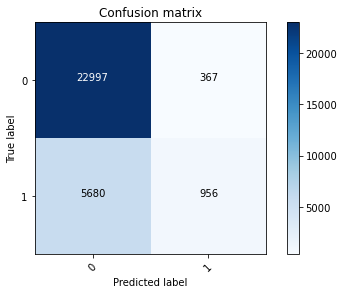

<Figure size 432x288 with 0 Axes>

In [73]:
# Avaliação da regra de negócio

y_true = df_input['Inadimplente'].values.tolist()
y_pred = df_input['pred_regra_negocio'].values.tolist()

cm = confusion_matrix(y_true, y_pred)

HelperClass.mostra_resultados_modelo(cm, porcentagem_qtd_true_positive,
                                     porcentagem_qtd_false_negative,
                                     porcentagem_valor_true_positive,
                                     porcentagem_valor_false_negative)

## 4. Modelo de aprendizado de máquina

##### Data prep para os modelos

In [74]:
# Normalização dos dados
df_input = HelperClass.normaliza_dados(df_input)

In [75]:
# separação dos dados em X and y
X = df_input[lista_colunas_train_full + ['Inadimplente']]
y = df_input.loc[:, 'Inadimplente']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24000, 131) (24000,) (6000, 131) (6000,)


##### Modelo 1: Regressão Logística

Best Params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Best AUC: 0.7653313490697142
******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     761
  True Negative    3857
 False Negative     543
 False Positive     839
       Accuracy  0.7697
      Precision  0.4756
         Recall  0.5836
    Specificity  0.8213
       F1 Score  0.5241
  Roc Auc Score  0.7648
******************************
Confusion matrix, without normalization:


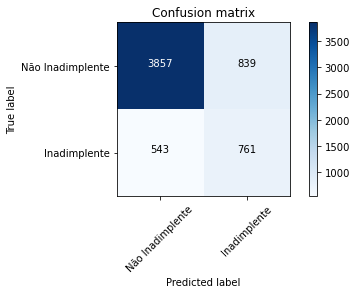

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


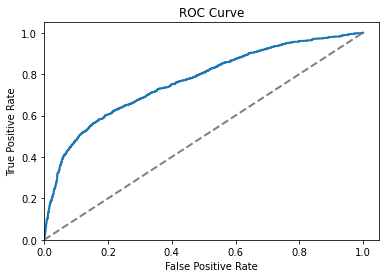

******************************
Precision Recall Curve:
******************************


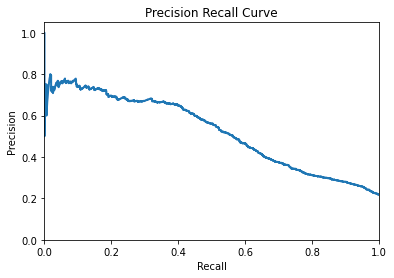

In [76]:
# Regressão Logística

colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_LR = LogisticRegression()


param_grid = {
            'penalty': ['l1', 'l2'], 
            'class_weight': ['balanced'], 
            'C': [10, 100]
            }

clf_LR_grid_search = GridSearchCV(estimator = clf_LR,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_LR_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_LR_grid_search.best_params_)
print ('Best AUC:', clf_LR_grid_search.best_score_)

# Fit and Predict
y_pred = clf_LR_grid_search.predict(X_test_use)
y_scores_LR = clf_LR_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_LR, classes)

##### Modelo 2: Árvore de Decisão

Best Params: {'criterion': 'entropy', 'max_depth': 6}
Best AUC: 0.7449561437457738
******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     448
  True Negative    4464
 False Negative     856
 False Positive     232
       Accuracy  0.8187
      Precision  0.6588
         Recall  0.3436
    Specificity  0.9506
       F1 Score  0.4516
  Roc Auc Score  0.7639
******************************
Confusion matrix, without normalization:


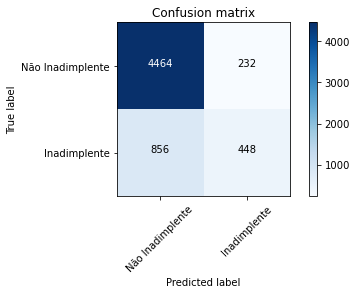

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


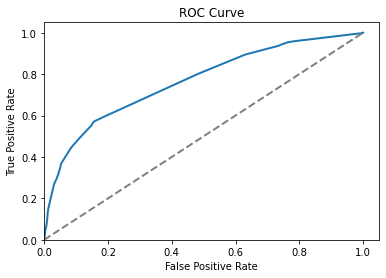

******************************
Precision Recall Curve:
******************************


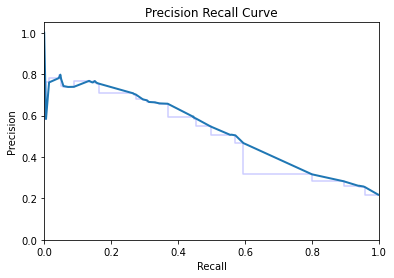

In [77]:
# Arvore de Decisao
colunas_usar = lista_colunas_train_com_norm_com_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_Tree = DecisionTreeClassifier()

param_grid = {
            'criterion':['entropy', 'gini'],
            'max_depth': [3, 4, 5, 6]
            }

clf_Tree_grid_search = GridSearchCV(estimator = clf_Tree,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_Tree_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_Tree_grid_search.best_params_)
print ('Best AUC:', clf_Tree_grid_search.best_score_)

# Fit and Predict
y_pred = clf_Tree_grid_search.predict(X_test_use)
y_scores_Tree = clf_Tree_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_Tree, classes)

##### Modelo 3: k Nearest Neighbors (kNN)

Best Params: {'n_neighbors': 25, 'weights': 'uniform'}
Best AUC: 0.7519857253253764
******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     466
  True Negative    4430
 False Negative     838
 False Positive     266
       Accuracy  0.8160
      Precision  0.6366
         Recall  0.3574
    Specificity  0.9434
       F1 Score  0.4578
  Roc Auc Score  0.7583
******************************
Confusion matrix, without normalization:


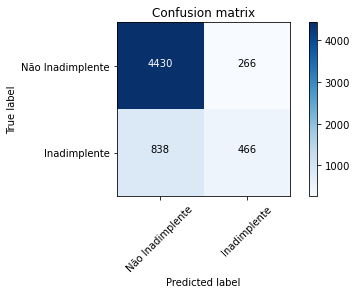

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


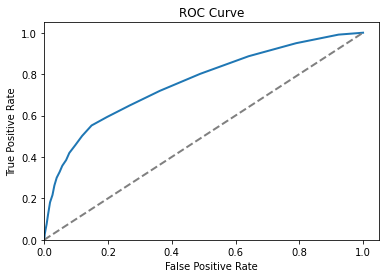

******************************
Precision Recall Curve:
******************************


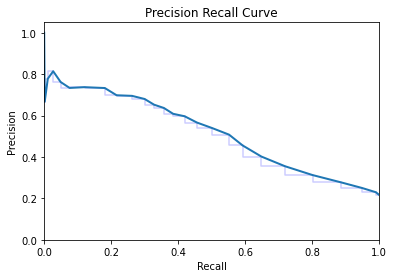

In [78]:
# Knn
colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_kNN = KNeighborsClassifier()

param_grid = {
            'n_neighbors': [5, 15, 25],
            'weights': ['uniform', 'distance']
            }

clf_kNN_grid_search = GridSearchCV(estimator = clf_kNN,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_kNN_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_kNN_grid_search.best_params_)
print ('Best AUC:', clf_kNN_grid_search.best_score_)

# Fit and Predict
y_pred = clf_kNN_grid_search.predict(X_test_use)
y_scores_kNN = clf_kNN_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_kNN, classes)

##### Modelo 4: Gaussian Naive Bayes

******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     433
  True Negative    4499
 False Negative     871
 False Positive     197
       Accuracy  0.8220
      Precision  0.6873
         Recall  0.3321
    Specificity  0.9580
       F1 Score  0.4478
  Roc Auc Score  0.7304
******************************
Confusion matrix, without normalization:


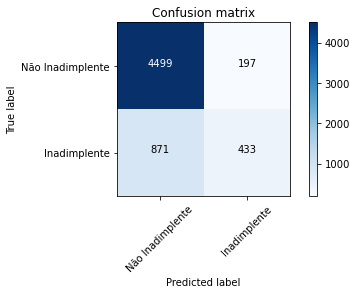

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


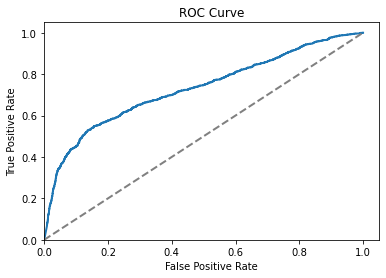

******************************
Precision Recall Curve:
******************************


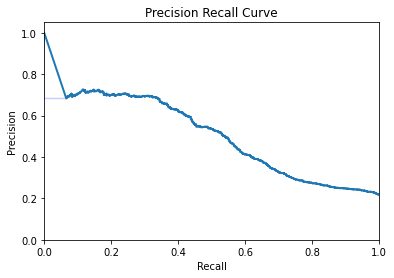

In [79]:
# Gaussian Naive Bayes
colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_Gaussian_NB = GaussianNB()
clf_Gaussian_NB.fit(X_train_use, y_train)

# Fit and Predict
y_pred = clf_Gaussian_NB.predict(X_test_use)
y_scores_Gaussian_NB = clf_Gaussian_NB.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_Gaussian_NB, classes)

##### Modelo 5: Random Forest Classifier

Best Params: {'bootstrap': False, 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 500, 'min_samples_split': 10, 'n_estimators': 200}
Best AUC: 0.7781244934534963
******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     341
  True Negative    4519
 False Negative     963
 False Positive     177
       Accuracy  0.8100
      Precision  0.6583
         Recall  0.2615
    Specificity  0.9623
       F1 Score  0.3743
  Roc Auc Score  0.7821
******************************
Confusion matrix, without normalization:


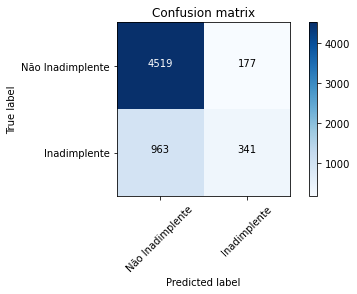

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


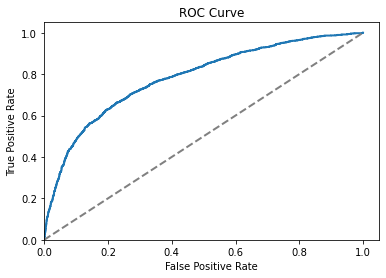

******************************
Precision Recall Curve:
******************************


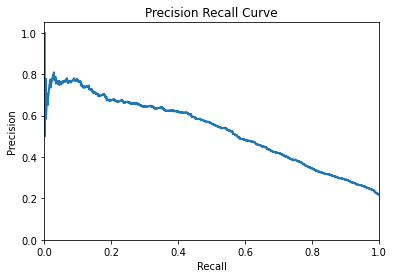

In [80]:
# Random Forest
colunas_usar = lista_colunas_train_sem_norm_sem_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]
clf_RF = RandomForestClassifier()

param_grid = {'bootstrap': [False],
             'max_depth': [4, 8, 16],
             'max_features': ['auto'],
             'min_samples_leaf': [500],
             'min_samples_split': [10],
             'n_estimators': [100, 200]
             }

clf_RF_grid_search = GridSearchCV(estimator = clf_RF,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_RF_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_RF_grid_search.best_params_)
print ('Best AUC:', clf_RF_grid_search.best_score_)

# Fit and Predict
y_pred = clf_RF_grid_search.predict(X_test_use)
y_scores_RF = clf_RF_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_RF, classes)

##### Modelo 6: LightGBM (Boosting de Gradiente)

Melhores hiperparametros:
{'colsample_bytree': 0.75, 'n_estimators': 140, 'num_leaves': 8, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.75}
0.7843782250272165
******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     494
  True Negative    4431
 False Negative     810
 False Positive     265
       Accuracy  0.8208
      Precision  0.6509
         Recall  0.3788
    Specificity  0.9436
       F1 Score  0.4789
  Roc Auc Score  0.7901
******************************
Confusion matrix, without normalization:


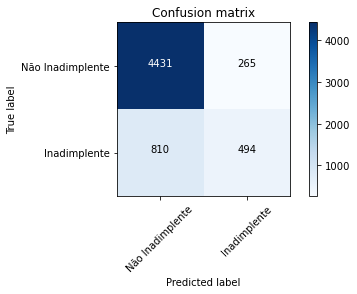

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


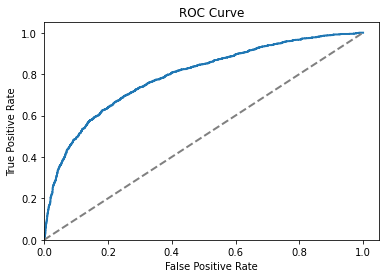

******************************
Precision Recall Curve:
******************************


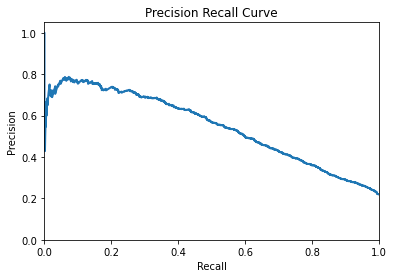

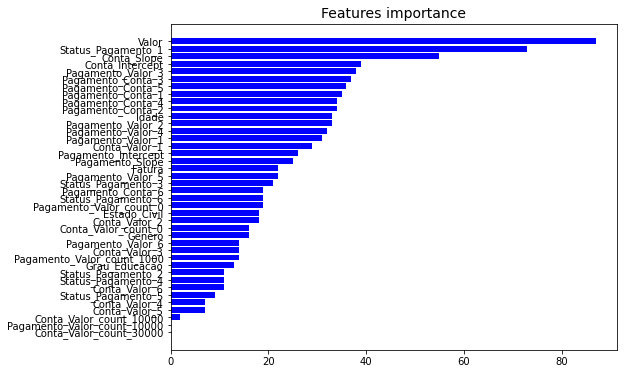

Feature  Feature importance
0                         Valor                  87
1            Status_Pagamento_1                  73
2                   Conta_Slope                  55
3               Conta_Intercept                  39
4             Pagamento_Valor_3                  38
5             Pagamento_Conta_3                  37
6             Pagamento_Conta_5                  36
7             Pagamento_Conta_1                  35
8             Pagamento_Conta_4                  34
9             Pagamento_Conta_2                  34
10                        Idade                  33
11            Pagamento_Valor_2                  33
12            Pagamento_Valor_4                  32
13            Pagamento_Valor_1                  31
14                Conta_Valor_1                  29
15          Pagamento_Intercept                  26
16              Pagamento_Slope                  25
17                       Fatura                  22
18            Pagamento_Valor_5                  22
19           Status_Pagamento_3                  21
20            Pagamento_Conta_6                  19
21           Status_Pagamento_6                  19
22      Pagamento_Valor_count_0                  19
23                 Estado_Civil                  18
24                Conta_Valor_2                  18
25          Conta_Valor_count_0                  16
26                       Genero                  16
27            Pagamento_Valor_6                  14
28                Conta_Valor_3                  14
29   Pagamento_Valor_count_1000                  14
30                Grau_Educacao                  13
31           Status_Pagamento_2                  11
32           Status_Pagamento_4                  11
33                Conta_Valor_6                  11
34           Status_Pagamento_5                   9
35                Conta_Valor_4                   7
36                Conta_Valor_5                   7
37      Conta_Valor_count_10000                   2
38  Pagamento_Valor_count_10000                   0
39      Conta_Valor_count_30000                   0

In [81]:
'''
Modelos baseados em boosting melhoram a flexibilidade de modelos simples
executando uma série de modelos mais simples em sequência.
Cada um deles aprenderá com os erros do anterior.
No final, ele os modelos mais simples são combinados em um único modelo mais robusto.
'''

# lightgbm object
colunas_usar = lista_colunas_train_sem_norm_sem_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

lgb_train_data = lgb.Dataset(X_train_use,
                             label=y_train,
                             categorical_feature=['Genero', 'Grau_Educacao', 'Estado_Civil'])

# Parameters
params_set = {'num_class': 1,
              'metric': 'binary_error',
              'learning_rate': 0.08,
              'boosting_type': 'gbdt',
              'random_state': 42,
              'max_depth': -1,
              'objective': 'binary',
              'nthread': 5,
              'max_bin': 400,
              'subsample_for_bin': 100,
              'subsample_freq': 1,
              'colsample_bytree': 0.8,
              'min_data_in_leaf': 1000
              }


# Create parameters to search
param_grid = {
            'n_estimators': [100, 120, 140, 160],
            'num_leaves': [4, 8],
            'reg_alpha': [1, 2],
            'reg_lambda': [1, 2],
            'colsample_bytree': [0.65, 0.75],
            'subsample' : [0.7, 0.75],
            }

# LightGBM Classifier
clf_lgbm = lgb.LGBMClassifier(boosting_type = 'gbdt',
                              learning_rate = params_set['learning_rate'],
                              metric = params_set['metric'],
                              max_depth = params_set['max_depth'],
                              max_bin = params_set['max_bin'],
                              subsample_freq = params_set['subsample_freq'],
                              min_data_in_leaf = params_set['min_data_in_leaf'],
                              objective = params_set['objective'],
                              n_jobs = -1)


# parametros
clf_lgbm.get_params().keys()

# Grid search
clf_grid_search = GridSearchCV(estimator = clf_lgbm,
                               param_grid = param_grid,
                               scoring = 'roc_auc',
                               cv = 5,
                               n_jobs = -1)

clf_grid_search.fit(X_train_use, y_train)

# Print the best parameters found
print ('Melhores hiperparametros:')
print(clf_grid_search.best_params_)
print(clf_grid_search.best_score_)

# Apply best parameters from grid search
params_set['num_leaves'] = clf_grid_search.best_params_['num_leaves']
params_set['n_estimators'] = clf_grid_search.best_params_['n_estimators']
params_set['reg_alpha'] = clf_grid_search.best_params_['reg_alpha']
params_set['colsample_bytree'] = clf_grid_search.best_params_['colsample_bytree']
params_set['subsample'] = clf_grid_search.best_params_['subsample']

# Training
clf_lgbm = lgb.train(params_set,
                     lgb_train_data,
                     verbose_eval=3)

# Prediction with probabilities
y_scores_LightGBM = clf_lgbm.predict(X_test_use)

# Predictions binary
threshold = 0.5
y_pred = np.where(y_scores_LightGBM > threshold, 1, 0)

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_LightGBM, classes)

# importancia das variaveis
features_importances_lgbm = clf_lgbm.feature_importance()
df = HelperClass.plot_feature_importance(colunas_usar, features_importances_lgbm, 50)
df

##### Modelo 7: Redes Neurais Artificiais

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3072      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 44,673
Trainable params: 44,673
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
132/132 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7995 - val_loss: 0.4413 - val_accuracy: 0.8156
Epoch 2/5
132/132 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8211 - val

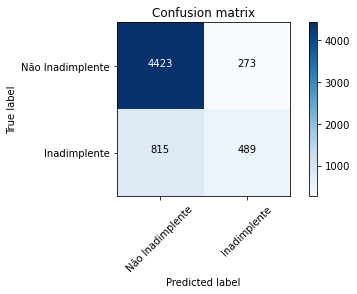

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


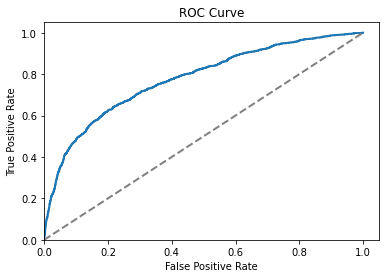

******************************
Precision Recall Curve:
******************************


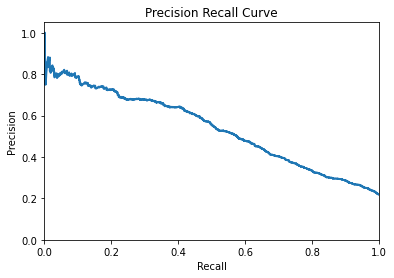

In [82]:
# Keras Artificial Neural Network (ANN) model
colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

model = Sequential()
model.add(Dense(64, activation='relu',
                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                input_dim=(len(colunas_usar))))

model.add(Dense(128, activation='relu',
               kernel_initializer = keras.initializers.glorot_uniform(seed=None)))

model.add(Dense(256, activation='relu',
               kernel_initializer = keras.initializers.glorot_uniform(seed=None)))

model.add(Dense(1, activation='sigmoid',
               kernel_initializer = keras.initializers.glorot_uniform(seed=None)))

print(model.summary())


# Model compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model fit
model.fit(X_train_use, y_train,
          epochs=5,
          batch_size=128,
          validation_split=0.3)

# Predict
y_scores_ANN = model.predict(X_test_use)
y_pred = [1 if element > 0.5 else 0 for element in y_scores_ANN]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_ANN, classes)

#### Comparação dos modelos

******************************
Todas as Curvas ROC:
******************************


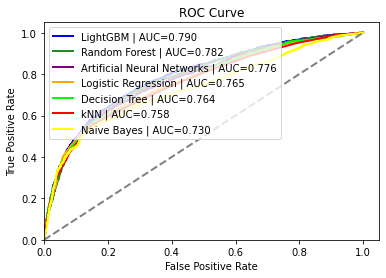

<Figure size 864x720 with 0 Axes>

In [83]:
# Curvas ROC para os 7 modelos desenvolvidos
HelperClass.stars()
print ("Todas as Curvas ROC:")
HelperClass.stars()

plt.figure()

# LightGBM
fpr, tpr, thresholds = roc_curve(y_test, y_scores_LightGBM)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_LightGBM))
plt.plot(fpr, tpr, label = 'LightGBM | AUC='+str(auc), linewidth = 2, color='blue')

# Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_RF))
plt.plot(fpr, tpr, label = 'Random Forest | AUC='+str(auc), linewidth = 2, color='forestgreen')

# Redes Neurais
fpr, tpr, thresholds = roc_curve(y_test, y_scores_ANN)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_ANN))
plt.plot(fpr, tpr, label = 'Artificial Neural Networks | AUC='+str(auc), linewidth = 2, color='purple')

# Regressão Logística
fpr, tpr, thresholds = roc_curve(y_test, y_scores_LR)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_LR))
plt.plot(fpr, tpr, label = 'Logistic Regression | AUC='+str(auc), linewidth = 2, color='orange')

# Árvre de Decisão
fpr, tpr, thresholds = roc_curve(y_test, y_scores_Tree)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_Tree))
plt.plot(fpr, tpr, label = 'Decision Tree | AUC='+str(auc), linewidth = 2, color='lime')

# k Nearest Neighbors
fpr, tpr, thresholds = roc_curve(y_test, y_scores_kNN)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_kNN))
plt.plot(fpr, tpr, label = 'kNN | AUC='+str(auc), linewidth = 2, color='red')

# Gaussian Naive Bayes
fpr, tpr, thresholds = roc_curve(y_test, y_scores_Gaussian_NB)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_Gaussian_NB))
plt.plot(fpr, tpr, label = 'Naive Bayes | AUC='+str(auc), linewidth = 2, color='yellow')

# Plot
rcParams['figure.figsize'] = 12,10
plt.title('ROC Curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], 'k--', linewidth = 2, color='grey')
plt.legend(loc='upper left')
plt.figure(figsize = (12,10))
plt.show()

##### Melhor modelo desenvolvido, com os hiperparâmetros otimizados (Lgbm)

Melhores hiperparametros:
{'colsample_bytree': 0.65, 'n_estimators': 140, 'num_leaves': 8, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.7841399396533666
******************************
Metrics Report:
******************************
Classification Report:
******************************
  True Positive     495
  True Negative    4427
 False Negative     809
 False Positive     269
       Accuracy  0.8203
      Precision  0.6479
         Recall  0.3796
    Specificity  0.9427
       F1 Score  0.4787
  Roc Auc Score  0.7907
******************************
Confusion matrix, without normalization:


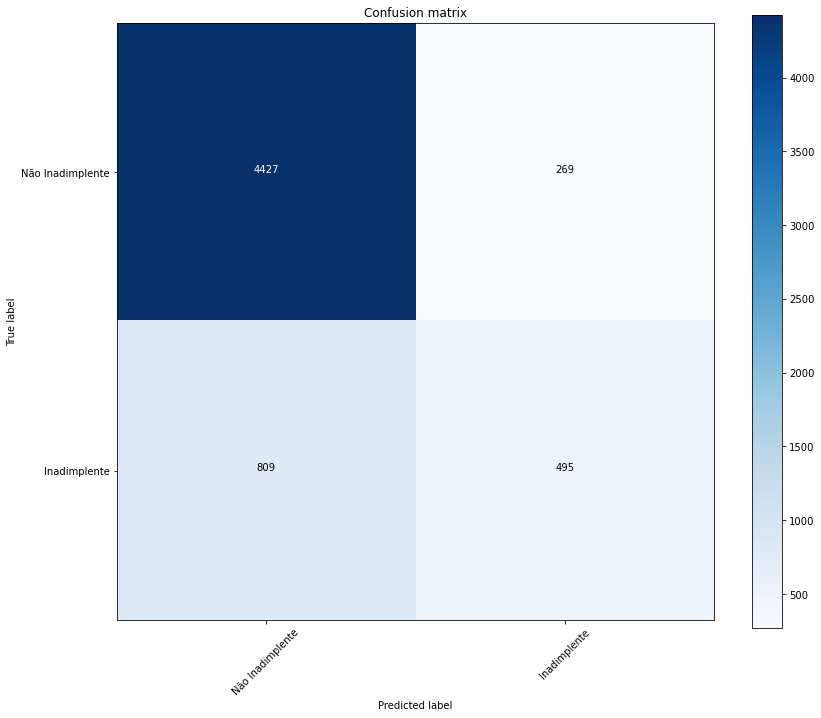

<Figure size 432x288 with 0 Axes>

******************************
Roc Curve:
******************************


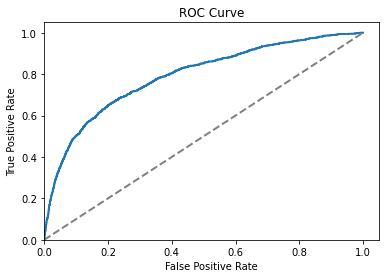

******************************
Precision Recall Curve:
******************************


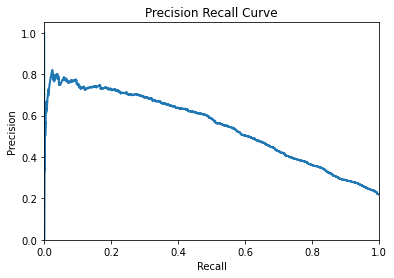

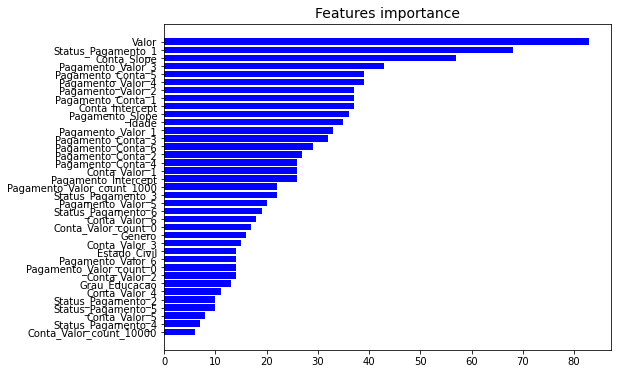

In [84]:
# Mais uma última rodada para tunar os hiperparametors do modelo
colunas_usar = lista_colunas_modelo_final
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

lgb_train_data = lgb.Dataset(X_train_use,
                             label=y_train,
                             categorical_feature=['Genero', 'Grau_Educacao', 'Estado_Civil'])

# Parameters
params_set = {'num_class': 1,
              'metric': 'binary_error',
              'learning_rate': 0.08,
              'boosting_type': 'gbdt',
              'random_state': 42,
              'max_depth': -1,
              'objective': 'binary',
              'nthread': 5,
              'max_bin': 400,
              'subsample_for_bin': 100,
              'subsample_freq': 1,
              'colsample_bytree': 0.8,
              'min_data_in_leaf': 1000
              }


# Create parameters to search
param_grid = {
            'n_estimators': [130, 140, 150, 160],
            'num_leaves': [8],
            'reg_alpha': [1],
            'reg_lambda': [1],
            'colsample_bytree': [0.6, 0.65],
            'subsample' : [0.7],
            }

# LightGBM Classifier
clf_lgbm = lgb.LGBMClassifier(boosting_type = 'gbdt',
                              learning_rate = params_set['learning_rate'],
                              metric = params_set['metric'],
                              max_depth = params_set['max_depth'],
                              max_bin = params_set['max_bin'],
                              subsample_freq = params_set['subsample_freq'],
                              min_data_in_leaf = params_set['min_data_in_leaf'],
                              objective = params_set['objective'],
                              n_jobs = -1)


# parametros
clf_lgbm.get_params().keys()

# Grid search
clf_grid_search = GridSearchCV(estimator = clf_lgbm,
                               param_grid = param_grid,
                               scoring = 'roc_auc',
                               cv = 5,
                               n_jobs = -1)

clf_grid_search.fit(X_train_use, y_train)

# Print the best parameters found
print ('Melhores hiperparametros:')
print(clf_grid_search.best_params_)
print(clf_grid_search.best_score_)

# Apply best parameters from grid search
params_set['num_leaves'] = clf_grid_search.best_params_['num_leaves']
params_set['n_estimators'] = clf_grid_search.best_params_['n_estimators']
params_set['reg_alpha'] = clf_grid_search.best_params_['reg_alpha']
params_set['colsample_bytree'] = clf_grid_search.best_params_['colsample_bytree']
params_set['subsample'] = clf_grid_search.best_params_['subsample']

# Training
clf_lgbm = lgb.train(params_set,
                     lgb_train_data,
                     verbose_eval=3)

# Prediction with probabilities
y_scores_LightGBM = clf_lgbm.predict(X_test_use)

# Predictions binary
threshold = 0.5
y_pred = np.where(y_scores_LightGBM > threshold, 1, 0)

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_LightGBM, classes)

# importancia das variaveis
features_importances_lgbm = clf_lgbm.feature_importance()
df = HelperClass.plot_feature_importance(colunas_usar, features_importances_lgbm, 50)

##### Persiste em memória o objeto pickle do melhor modelo desenvolvido

In [85]:
# salva o modelo final
joblib.dump(clf_lgbm, 'clf_ligacao.pkl')

['clf_ligacao.pkl']

### 4.2) Avaliação do modelo e escolha do threshold

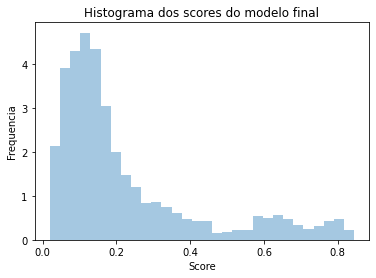

In [86]:
# distribuição do score do modelo final
plt.figure(figsize = (6,4))
plt.title('Histograma dos scores do modelo final')
plt.xlabel('Score')
plt.ylabel('Frequencia')
sns.distplot(y_scores_LightGBM, bins=30, kde=False, norm_hist=True);

#### Lucro otimizado para o dataset de teste (20%) e projetado para o dataset completo

Melhor lucro atualmente: -1020377117.14
Parametros: 0.0
******
Melhor lucro atualmente: -1019996218.57
Parametros: 0.0197
******
Melhor lucro atualmente: -1019701799.62
Parametros: 0.0212
******
Melhor lucro atualmente: -1019501656.87
Parametros: 0.0218
******
Melhor lucro atualmente: -1019171274.95
Parametros: 0.0234
******
Melhor lucro atualmente: -1018854375.91
Parametros: 0.0236
******
Melhor lucro atualmente: -1018801305.64
Parametros: 0.0237
******
Melhor lucro atualmente: -1018310315.6
Parametros: 0.0238
******
Melhor lucro atualmente: -1018232169.43
Parametros: 0.0246
******
Melhor lucro atualmente: -1017801827.99
Parametros: 0.0247
******
Melhor lucro atualmente: -1017581468.7
Parametros: 0.0252
******
Melhor lucro atualmente: -1016863207.44
Parametros: 0.0253
******
Melhor lucro atualmente: -1016551230.2
Parametros: 0.0255
******
Melhor lucro atualmente: -1016476904.87
Parametros: 0.0256
******
Melhor lucro atualmente: -1016124081.1
Parametros: 0.0258
******
Melhor lucro atua

Melhor lucro atualmente: -971705772.98
Parametros: 0.0431
******
Melhor lucro atualmente: -971087799.88
Parametros: 0.0432
******
Melhor lucro atualmente: -970938731.77
Parametros: 0.0433
******
Melhor lucro atualmente: -970704018.68
Parametros: 0.0434
******
Melhor lucro atualmente: -970376406.95
Parametros: 0.0435
******
Melhor lucro atualmente: -969805195.66
Parametros: 0.0436
******
Melhor lucro atualmente: -969610188.89
Parametros: 0.0438
******
Melhor lucro atualmente: -969510198.82
Parametros: 0.0439
******
Melhor lucro atualmente: -968097471.58
Parametros: 0.044
******
Melhor lucro atualmente: -967954111.23
Parametros: 0.0441
******
Melhor lucro atualmente: -967561375.91
Parametros: 0.0442
******
Melhor lucro atualmente: -967411112.66
Parametros: 0.0443
******
Melhor lucro atualmente: -966918232.28
Parametros: 0.0444
******
Melhor lucro atualmente: -966454665.11
Parametros: 0.0445
******
Melhor lucro atualmente: -965712197.83
Parametros: 0.0447
******
Melhor lucro atualmente: -

Melhor lucro atualmente: -912462486.18
Parametros: 0.0582
******
Melhor lucro atualmente: -912124256.01
Parametros: 0.0583
******
Melhor lucro atualmente: -911312952.95
Parametros: 0.0584
******
Melhor lucro atualmente: -911155921.24
Parametros: 0.0585
******
Melhor lucro atualmente: -910874691.43
Parametros: 0.0586
******
Melhor lucro atualmente: -910752608.93
Parametros: 0.0587
******
Melhor lucro atualmente: -910427316.96
Parametros: 0.0589
******
Melhor lucro atualmente: -910250056.93
Parametros: 0.059
******
Melhor lucro atualmente: -909574595.15
Parametros: 0.0591
******
Melhor lucro atualmente: -908345404.12
Parametros: 0.0593
******
Melhor lucro atualmente: -907811494.55
Parametros: 0.0594
******
Melhor lucro atualmente: -907252154.6
Parametros: 0.0595
******
Melhor lucro atualmente: -906932442.08
Parametros: 0.0596
******
Melhor lucro atualmente: -906777565.55
Parametros: 0.0598
******
Melhor lucro atualmente: -906631744.49
Parametros: 0.0599
******
Melhor lucro atualmente: -9

Melhor lucro atualmente: -836157675.12
Parametros: 0.0734
******
Melhor lucro atualmente: -834688432.59
Parametros: 0.0735
******
Melhor lucro atualmente: -833586455.93
Parametros: 0.0736
******
Melhor lucro atualmente: -833178517.67
Parametros: 0.0738
******
Melhor lucro atualmente: -831583714.42
Parametros: 0.0739
******
Melhor lucro atualmente: -831159154.2
Parametros: 0.074
******
Melhor lucro atualmente: -831072153.41
Parametros: 0.0741
******
Melhor lucro atualmente: -829926470.53
Parametros: 0.0742
******
Melhor lucro atualmente: -828839478.48
Parametros: 0.0743
******
Melhor lucro atualmente: -827524518.32
Parametros: 0.0744
******
Melhor lucro atualmente: -826762029.36
Parametros: 0.0745
******
Melhor lucro atualmente: -826486990.25
Parametros: 0.0746
******
Melhor lucro atualmente: -824840877.63
Parametros: 0.0747
******
Melhor lucro atualmente: -824275962.21
Parametros: 0.0748
******
Melhor lucro atualmente: -823766995.07
Parametros: 0.0749
******
Melhor lucro atualmente: -8

Melhor lucro atualmente: -745264506.98
Parametros: 0.0884
******
Melhor lucro atualmente: -744947035.85
Parametros: 0.0885
******
Melhor lucro atualmente: -743939287.79
Parametros: 0.0886
******
Melhor lucro atualmente: -743573758.0
Parametros: 0.0887
******
Melhor lucro atualmente: -743445301.1
Parametros: 0.0888
******
Melhor lucro atualmente: -742588007.73
Parametros: 0.0889
******
Melhor lucro atualmente: -742399274.28
Parametros: 0.089
******
Melhor lucro atualmente: -741922893.56
Parametros: 0.0891
******
Melhor lucro atualmente: -741476114.83
Parametros: 0.0892
******
Melhor lucro atualmente: -741223250.57
Parametros: 0.0893
******
Melhor lucro atualmente: -741018731.3
Parametros: 0.0894
******
Melhor lucro atualmente: -740310479.58
Parametros: 0.0895
******
Melhor lucro atualmente: -739987145.71
Parametros: 0.0896
******
Melhor lucro atualmente: -737952459.01
Parametros: 0.0897
******
Melhor lucro atualmente: -736576818.5
Parametros: 0.0899
******
Melhor lucro atualmente: -7359

Melhor lucro atualmente: -665911686.07
Parametros: 0.1034
******
Melhor lucro atualmente: -665484231.44
Parametros: 0.1035
******
Melhor lucro atualmente: -664704334.12
Parametros: 0.1036
******
Melhor lucro atualmente: -663516274.63
Parametros: 0.1037
******
Melhor lucro atualmente: -661730560.19
Parametros: 0.1038
******
Melhor lucro atualmente: -661674468.53
Parametros: 0.1039
******
Melhor lucro atualmente: -661085705.86
Parametros: 0.104
******
Melhor lucro atualmente: -660992558.93
Parametros: 0.1041
******
Melhor lucro atualmente: -660832866.95
Parametros: 0.1042
******
Melhor lucro atualmente: -660204558.69
Parametros: 0.1044
******
Melhor lucro atualmente: -659866825.79
Parametros: 0.1045
******
Melhor lucro atualmente: -659006501.27
Parametros: 0.1046
******
Melhor lucro atualmente: -658915469.18
Parametros: 0.1047
******
Melhor lucro atualmente: -658352973.77
Parametros: 0.1048
******
Melhor lucro atualmente: -655580650.36
Parametros: 0.1049
******
Melhor lucro atualmente: -

Parametros: 0.1191
******
Melhor lucro atualmente: -585118015.15
Parametros: 0.1192
******
Melhor lucro atualmente: -584739131.89
Parametros: 0.1193
******
Melhor lucro atualmente: -584518781.02
Parametros: 0.1195
******
Melhor lucro atualmente: -584296542.5
Parametros: 0.1196
******
Melhor lucro atualmente: -583744789.9
Parametros: 0.1197
******
Melhor lucro atualmente: -583593736.6
Parametros: 0.1198
******
Melhor lucro atualmente: -583482898.11
Parametros: 0.12
******
Melhor lucro atualmente: -582044270.12
Parametros: 0.1201
******
Melhor lucro atualmente: -581247741.68
Parametros: 0.1202
******
Melhor lucro atualmente: -579701983.98
Parametros: 0.1203
******
Melhor lucro atualmente: -578555816.8
Parametros: 0.1204
******
Melhor lucro atualmente: -578077899.19
Parametros: 0.1205
******
Melhor lucro atualmente: -576993402.73
Parametros: 0.1206
******
Melhor lucro atualmente: -575202898.92
Parametros: 0.1207
******
Melhor lucro atualmente: -574456680.55
Parametros: 0.1208
******
Melho

Melhor lucro atualmente: -485920003.63
Parametros: 0.1353
******
Melhor lucro atualmente: -485888135.36
Parametros: 0.1354
******
Melhor lucro atualmente: -485517414.6
Parametros: 0.1355
******
Melhor lucro atualmente: -485500845.19
Parametros: 0.1356
******
Melhor lucro atualmente: -485185307.42
Parametros: 0.1358
******
Melhor lucro atualmente: -485099233.5
Parametros: 0.1359
******
Melhor lucro atualmente: -485023092.96
Parametros: 0.136
******
Melhor lucro atualmente: -482989898.52
Parametros: 0.1361
******
Melhor lucro atualmente: -482205702.16
Parametros: 0.1362
******
Melhor lucro atualmente: -481551171.2
Parametros: 0.1363
******
Melhor lucro atualmente: -481388209.67
Parametros: 0.1364
******
Melhor lucro atualmente: -480056996.8
Parametros: 0.1365
******
Melhor lucro atualmente: -480036792.63
Parametros: 0.1366
******
Melhor lucro atualmente: -479232262.93
Parametros: 0.1367
******
Melhor lucro atualmente: -478368077.63
Parametros: 0.1368
******
Melhor lucro atualmente: -4769

Melhor lucro atualmente: -414378330.63
Parametros: 0.1519
******
Melhor lucro atualmente: -414179416.56
Parametros: 0.1521
******
Melhor lucro atualmente: -414131735.91
Parametros: 0.1522
******
Melhor lucro atualmente: -413653633.26
Parametros: 0.1524
******
Melhor lucro atualmente: -413443372.34
Parametros: 0.1525
******
Melhor lucro atualmente: -412798675.86
Parametros: 0.1526
******
Melhor lucro atualmente: -411378130.63
Parametros: 0.1528
******
Melhor lucro atualmente: -410370758.14
Parametros: 0.1529
******
Melhor lucro atualmente: -410163197.73
Parametros: 0.153
******
Melhor lucro atualmente: -409896158.74
Parametros: 0.1531
******
Melhor lucro atualmente: -409674481.06
Parametros: 0.1532
******
Melhor lucro atualmente: -409424074.46
Parametros: 0.1533
******
Melhor lucro atualmente: -409412057.6
Parametros: 0.1534
******
Melhor lucro atualmente: -409403783.6
Parametros: 0.1536
******
Melhor lucro atualmente: -409371544.05
Parametros: 0.1537
******
Melhor lucro atualmente: -40

Melhor lucro atualmente: -354399016.36
Parametros: 0.1705
******
Melhor lucro atualmente: -353775904.24
Parametros: 0.1706
******
Melhor lucro atualmente: -353263137.14
Parametros: 0.1708
******
Melhor lucro atualmente: -353137332.77
Parametros: 0.1709
******
Melhor lucro atualmente: -353018676.75
Parametros: 0.1711
******
Melhor lucro atualmente: -352583257.55
Parametros: 0.1712
******
Melhor lucro atualmente: -352153552.2
Parametros: 0.1713
******
Melhor lucro atualmente: -351317685.74
Parametros: 0.1719
******
Melhor lucro atualmente: -351302388.23
Parametros: 0.172
******
Melhor lucro atualmente: -351294460.47
Parametros: 0.1722
******
Melhor lucro atualmente: -350389869.48
Parametros: 0.1723
******
Melhor lucro atualmente: -349389693.41
Parametros: 0.1724
******
Melhor lucro atualmente: -349383628.12
Parametros: 0.1725
******
Melhor lucro atualmente: -349073628.63
Parametros: 0.1726
******
Melhor lucro atualmente: -347683270.51
Parametros: 0.1727
******
Melhor lucro atualmente: -3

Melhor lucro atualmente: -320827916.99
Parametros: 0.1903
******
Melhor lucro atualmente: -320729829.92
Parametros: 0.1904
******
Melhor lucro atualmente: -320668040.2
Parametros: 0.1905
******
Melhor lucro atualmente: -320608101.17
Parametros: 0.1907
******
Melhor lucro atualmente: -319872674.01
Parametros: 0.1909
******
Melhor lucro atualmente: -319867353.9
Parametros: 0.1912
******
Melhor lucro atualmente: -319796790.4
Parametros: 0.1913
******
Melhor lucro atualmente: -319741828.83
Parametros: 0.1915
******
Melhor lucro atualmente: -319387800.82
Parametros: 0.1917
******
Melhor lucro atualmente: -319387087.52
Parametros: 0.1918
******
Melhor lucro atualmente: -319386414.46
Parametros: 0.1919
******
Melhor lucro atualmente: -319378925.26
Parametros: 0.192
******
Melhor lucro atualmente: -319146451.92
Parametros: 0.1922
******
Melhor lucro atualmente: -319146220.84
Parametros: 0.1923
******
Melhor lucro atualmente: -319132143.41
Parametros: 0.1926
******
Melhor lucro atualmente: -318

Melhor lucro atualmente: -300187417.36
Parametros: 0.2177
******
Melhor lucro atualmente: -300166143.69
Parametros: 0.2182
******
Melhor lucro atualmente: -300163909.97
Parametros: 0.2183
******
Melhor lucro atualmente: -300160176.62
Parametros: 0.2184
******
Melhor lucro atualmente: -299982457.48
Parametros: 0.2186
******
Melhor lucro atualmente: -299980264.67
Parametros: 0.2187
******
Melhor lucro atualmente: -299958878.09
Parametros: 0.2188
******
Melhor lucro atualmente: -299779274.43
Parametros: 0.2189
******
Melhor lucro atualmente: -299775797.27
Parametros: 0.2194
******
Melhor lucro atualmente: -299773885.48
Parametros: 0.2196
******
Melhor lucro atualmente: -299746367.58
Parametros: 0.2198
******
Melhor lucro atualmente: -299165153.07
Parametros: 0.2201
******
Melhor lucro atualmente: -299086478.84
Parametros: 0.2208
******
Melhor lucro atualmente: -299061918.26
Parametros: 0.2215
******
Melhor lucro atualmente: -299060066.15
Parametros: 0.2216
******
Melhor lucro atualmente: 

Melhor lucro atualmente: -288882424.16
Parametros: 0.2517
******
Melhor lucro atualmente: -288854990.47
Parametros: 0.252
******
Melhor lucro atualmente: -288844993.88
Parametros: 0.2522
******
Melhor lucro atualmente: -288793671.72
Parametros: 0.2525
******
Melhor lucro atualmente: -288524200.86
Parametros: 0.2526
******
Melhor lucro atualmente: -288369154.66
Parametros: 0.2527
******
Melhor lucro atualmente: -288312866.79
Parametros: 0.2531
******
Melhor lucro atualmente: -288312379.23
Parametros: 0.2536
******
Melhor lucro atualmente: -288029737.11
Parametros: 0.2537
******
Melhor lucro atualmente: -288006326.03
Parametros: 0.2543
******
Melhor lucro atualmente: -287554840.86
Parametros: 0.2548
******
Melhor lucro atualmente: -287215975.72
Parametros: 0.2552
******
Melhor lucro atualmente: -287215095.06
Parametros: 0.2555
******
Melhor lucro atualmente: -287215045.06
Parametros: 0.2557
******
Melhor lucro atualmente: -287202979.66
Parametros: 0.2559
******
Melhor lucro atualmente: -

Melhor lucro atualmente: -275847607.69
Parametros: 0.3176
******
Melhor lucro atualmente: -275847507.69
Parametros: 0.3178
******
Melhor lucro atualmente: -275847357.09
Parametros: 0.3182
******
Melhor lucro atualmente: -275847307.09
Parametros: 0.3183
******
Melhor lucro atualmente: -275717403.66
Parametros: 0.3287
******
Melhor lucro atualmente: -275679222.15
Parametros: 0.3298
******
Melhor lucro atualmente: -275653555.96
Parametros: 0.3302
******
Melhor lucro atualmente: -275315087.96
Parametros: 0.3312
******
Melhor lucro atualmente: -275315037.96
Parametros: 0.3315
******
Melhor lucro atualmente: -275198689.44
Parametros: 0.3319
******
Melhor lucro atualmente: -275198498.59
Parametros: 0.3321
******
Melhor lucro atualmente: -275051729.25
Parametros: 0.3348
******
Melhor lucro atualmente: -275051679.25
Parametros: 0.335
******
Melhor lucro atualmente: -275049184.64
Parametros: 0.3351
******
Melhor lucro atualmente: -273361595.92
Parametros: 0.3357
******
Melhor lucro atualmente: -

Melhor lucro atualmente: -258774866.56
Parametros: 0.4177
******
Melhor lucro atualmente: -258655368.87
Parametros: 0.4203
******
Melhor lucro atualmente: -258560054.08
Parametros: 0.4204
******
Melhor lucro atualmente: -258531728.4
Parametros: 0.4208
******
Melhor lucro atualmente: -258457286.81
Parametros: 0.422
******
Melhor lucro atualmente: -258457236.81
Parametros: 0.4224
******
Melhor lucro atualmente: -258432815.13
Parametros: 0.4228
******
Melhor lucro atualmente: -258395405.81
Parametros: 0.423
******
Melhor lucro atualmente: -257815059.64
Parametros: 0.4332
******
Melhor lucro atualmente: -257740420.47
Parametros: 0.4339
******
Melhor lucro atualmente: -257305809.02
Parametros: 0.4353
******
Melhor lucro atualmente: -256857730.95
Parametros: 0.4362
******
Melhor lucro atualmente: -256773276.18
Parametros: 0.4379
******
Melhor lucro atualmente: -256698324.21
Parametros: 0.438
******
Melhor lucro atualmente: -256688158.7
Parametros: 0.4396
******
Melhor lucro atualmente: -2566

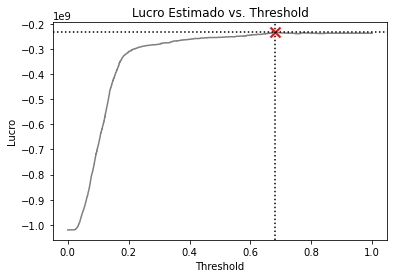

******************************
Melhor threshold do modelo: 0.682
Maior lucro para teste (20%): -233725551.95
Lucro projetado para toda a base: -1168627759.75
******************************
Inadimplencia Física: 0.2173
Inadimplencia Financeira: 0.2117


In [87]:
# otimização do lucro através da variação do threshold do modelo

maior_lucro = np.NINF
tamanho_publico_teste = len(X_test)
valor_atraso_teste = X_test['Atraso'].sum()
valor_fatura_teste = X_test['Fatura'].sum()

lista_thresholds_modelo = [round((x * 0.0001),4) for x in range(0, 10001)]
y_scores_LightGBM = clf_lgbm.predict(X_test[colunas_usar])
lista_lucros = []

for threshold_valor in lista_thresholds_modelo:
    
    X_test['pred_regra_negocio'] = np.where(y_scores_LightGBM >= threshold_valor, 1, 0)
        
    # Avaliação financeira
    true_positive = X_test.loc[(X_test['Inadimplente'] == 1) & (X_test['pred_regra_negocio'] == 1)]
    qtd_true_positive = len(true_positive)
    porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_teste
    porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_teste
    porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_teste

    false_positive = X_test.loc[(X_test['Inadimplente'] == 0) & (X_test['pred_regra_negocio'] == 1)]
    qtd_false_positive = len(false_positive)
    porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_teste
    porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_teste
    porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_teste

    true_negative = X_test.loc[(X_test['Inadimplente'] == 0) & (X_test['pred_regra_negocio'] == 0)]
    qtd_true_negative = len(true_negative)
    porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_teste
    porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_teste
    porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_teste

    false_negative = X_test.loc[(X_test['Inadimplente'] == 1) & (X_test['pred_regra_negocio'] == 0)]
    qtd_false_negative = len(false_negative)
    porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_teste
    porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_teste
    porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_teste


    lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                      porcentagem_fatura_valor_true_negative,
                                      porcentagem_fatura_valor_false_negative,
                                      porcentagem_fatura_valor_false_positive,
                                      porcentagem_fatura_valor_true_positive,
                                      qtd_true_positive, qtd_false_positive)
    
    lista_lucros.append(lucro)

    if (lucro > maior_lucro):
        maior_lucro = lucro
        melhor_threshold = threshold_valor
        print ('Melhor lucro atualmente:', maior_lucro)
        print ('Parametros:', melhor_threshold)
        print ('******')


X_test['pred_regra_negocio'] = np.where(y_scores_LightGBM >= melhor_threshold, 1, 0)

# Avaliação financeira
true_positive = X_test.loc[(X_test['Inadimplente'] == 1) & (X_test['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_teste
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_teste
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_teste

false_positive = X_test.loc[(X_test['Inadimplente'] == 0) & (X_test['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_teste
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_teste
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_teste

true_negative = X_test.loc[(X_test['Inadimplente'] == 0) & (X_test['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_teste
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_teste
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_teste

false_negative = X_test.loc[(X_test['Inadimplente'] == 1) & (X_test['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_teste
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_teste
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_teste


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)


inadimplencia_fisica = round((porcentagem_qtd_true_positive + porcentagem_qtd_false_negative), 4)
inadimplencia_financeira = round((porcentagem_valor_true_positive + porcentagem_valor_false_negative), 4)

plt.figure(figsize = (6,4))
plt.title('Lucro Estimado vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Lucro')
sns.lineplot(lista_thresholds_modelo, lista_lucros, color='grey')
sns.scatterplot([melhor_threshold], [maior_lucro], marker='x', s=100, linewidth=2, color='red')
plt.axvline(melhor_threshold, linestyle='dotted', color='black')
plt.axhline(maior_lucro, linestyle='dotted', color='black')
plt.show()
HelperClass.stars()
print ('Melhor threshold do modelo:', melhor_threshold)
print ('Maior lucro para teste (20%):', lucro)
print ('Lucro projetado para toda a base:', lucro*5)
HelperClass.stars()
print ('Inadimplencia Física:', inadimplencia_fisica)
print ('Inadimplencia Financeira:', inadimplencia_financeira)

#### Lucro estimado para todo o dataset

In [88]:
y_scores_LightGBM = clf_lgbm.predict(df_input[colunas_usar])
df_input['pred_regra_negocio'] = np.where(y_scores_LightGBM >= melhor_threshold, 1, 0)
df_input['score'] = y_scores_LightGBM

y_true = df_input['Inadimplente'].values.tolist()
y_pred = df_input['pred_regra_negocio'].values.tolist()

# Avaliação financeira
true_positive = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 1)]
qtd_true_positive = len(true_positive)
porcentagem_qtd_true_positive = qtd_true_positive / tamanho_publico_total
porcentagem_valor_true_positive = true_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_positive = true_positive['Fatura'].sum() / valor_fatura_total

false_positive = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 1)]
qtd_false_positive = len(false_positive)
porcentagem_qtd_false_positive = qtd_false_positive / tamanho_publico_total
porcentagem_valor_false_positive = false_positive['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_positive = false_positive['Fatura'].sum() / valor_fatura_total

true_negative = df_input.loc[(df_input['Inadimplente'] == 0) & (df_input['pred_regra_negocio'] == 0)]
qtd_true_negative = len(true_negative)
porcentagem_qtd_true_negative = qtd_true_negative / tamanho_publico_total
porcentagem_valor_true_negative = true_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_true_negative = true_negative['Fatura'].sum() / valor_fatura_total

false_negative = df_input.loc[(df_input['Inadimplente'] == 1) & (df_input['pred_regra_negocio'] == 0)]
qtd_false_negative = len(false_negative)
porcentagem_qtd_false_negative  = qtd_false_negative / tamanho_publico_total
porcentagem_valor_false_negative = false_negative['Atraso'].sum() / valor_atraso_total
porcentagem_fatura_valor_false_negative = false_negative['Fatura'].sum() / valor_fatura_total


lucro = HelperClass.calcula_lucro(valor_fatura_total,
                                  porcentagem_fatura_valor_true_negative,
                                  porcentagem_fatura_valor_false_negative,
                                  porcentagem_fatura_valor_false_positive,
                                  porcentagem_fatura_valor_true_positive,
                                  qtd_true_positive, qtd_false_positive)

HelperClass.print_resultados_modelo(porcentagem_qtd_true_negative,
                                    porcentagem_qtd_false_negative,
                                    porcentagem_qtd_true_positive,
                                    porcentagem_qtd_false_positive,
                                    porcentagem_valor_true_negative,
                                    porcentagem_valor_false_negative,
                                    porcentagem_valor_true_positive,
                                    porcentagem_valor_false_positive,
                                    porcentagem_fatura_valor_true_negative,
                                    porcentagem_fatura_valor_false_negative,
                                    porcentagem_fatura_valor_true_positive,
                                    porcentagem_fatura_valor_false_positive)

inadimplencia_fisica = round((porcentagem_qtd_true_positive + porcentagem_qtd_false_negative), 4)
inadimplencia_financeira = round((porcentagem_valor_true_positive + porcentagem_valor_false_negative), 4)

print ('Melhor threshold do modelo:', melhor_threshold)
print ('Maior lucro:', lucro)
HelperClass.stars()
print ('Inadimplencia Física:', inadimplencia_fisica)
print ('Inadimplencia Financeira:', inadimplencia_financeira)

******************************
Matriz de confusão do público em quantidade:
******************************
Verdadeiro Negativos: 76.51%
Falso Negativos: 17.79%
Verdadeiro Positivos: 4.33%
Falso Positivos: 1.37%
******************************
Matriz de confusão do público em valor atrasado:
******************************
Verdadeiro Negativos: 75.68%
Falso Negativos: 16.37%
Verdadeiro Positivos: 6.0%
Falso Positivos: 1.96%
******************************
Matriz de confusão do público em valor da fatura:
******************************
Verdadeiro Negativos: 76.81%
Falso Negativos: 15.84%
Verdadeiro Positivos: 5.54%
Falso Positivos: 1.81%
******************************
Melhor threshold do modelo: 0.682
Maior lucro: -249898192.24
******************************
Inadimplencia Física: 0.2212
Inadimplencia Financeira: 0.2237


Classification Report:
******************************
     Inadimplencia Fisica  0.2212
 Inadimplencia Financeira  0.2237
            True Positive    1299
            True Negative   22953
           False Negative    5337
           False Positive     411
                 Accuracy  0.8084
                Precision  0.7596
                   Recall  0.1958
              Specificity  0.9824
                 F1 Score  0.3113
Confusion matrix, without normalization:


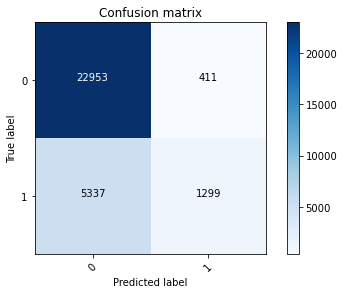

<Figure size 432x288 with 0 Axes>

In [89]:
# Avaliação do modelo

y_true = df_input['Inadimplente'].values.tolist()
y_pred = df_input['pred_regra_negocio'].values.tolist()

cm = confusion_matrix(y_true, y_pred)

HelperClass.mostra_resultados_modelo(cm, porcentagem_qtd_true_positive,
                                     porcentagem_qtd_false_negative,
                                     porcentagem_valor_true_positive,
                                     porcentagem_valor_false_negative)

Score mediano para os clientes que devemos ligar: 0.7649568843450207
Score mediano para os clientes que não devemos ligar: 0.14075726133090077
Quantidade de ligações: 1710
Porcentagem de ligações: 5.7%


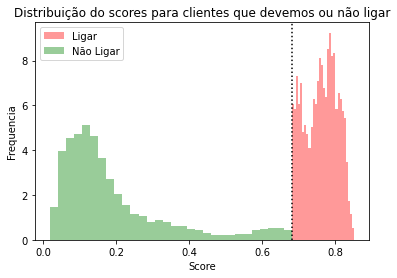

In [90]:
# Distribuição dos scores para clientes que devemos ligar ou não
# Dos 30.000 clientes que pegaram empréstimo, iremos ligar para 25.554 (85.18%)
quantidade_ligacoes = len(df_input.query('pred_regra_negocio == 1'))
porcentagem_ligacoes = round((100*quantidade_ligacoes/len(df_input)),2)
print ('Score mediano para os clientes que devemos ligar:', df_input.query('pred_regra_negocio == 1')['score'].median())
print ('Score mediano para os clientes que não devemos ligar:', df_input.query('pred_regra_negocio == 0')['score'].median())
print ('Quantidade de ligações: {}'.format(quantidade_ligacoes))
print ('Porcentagem de ligações: {}%'.format(porcentagem_ligacoes))
sns.distplot(df_input.query('pred_regra_negocio == 1')['score'], bins=30, label='Ligar',
                                                                 color='red', kde=False, norm_hist=True)

sns.distplot(df_input.query('pred_regra_negocio == 0')['score'], bins=30, label='Não Ligar',
                                                                 color='green', kde=False, norm_hist=True)

plt.axvline(melhor_threshold, linestyle='dotted', color='black')
plt.xlabel('Score')
plt.ylabel('Frequencia')
plt.title('Distribuição do scores para clientes que devemos ou não ligar')
plt.legend()
plt.show();

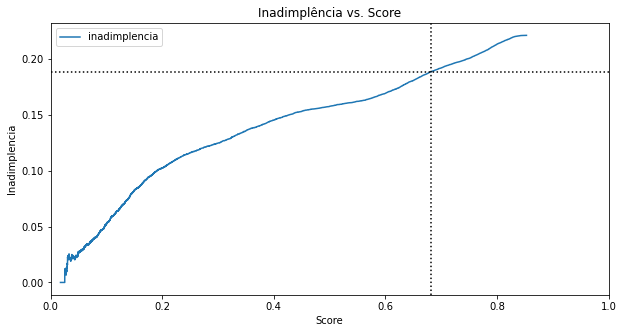

******************************
Threshold ideal: 0.682
Probabilidade equivalente: 0.1887
******************************


In [91]:
# Plota curva de inadinplencia observada vs. score
pred = pd.DataFrame()
pred['score'] = y_scores_LightGBM
pred['true'] = y_true
df = pred.sort_values(by='score', ascending=True).reset_index(drop=True).copy()
x_cumsum = (~df['true'].isnull()).cumsum()
target_zero = (df['true'] == 1).cumsum()
df['inadimplencia'] = (target_zero/x_cumsum)
prob_threshold = round((df.loc[df['score'] > melhor_threshold].iloc[0]['inadimplencia']),4)
df.plot(x='score', y='inadimplencia', figsize=(10,5), title='Inadimplência vs. Score')
plt.axvline(melhor_threshold, linestyle='dotted', color='black')
plt.axhline(prob_threshold, linestyle='dotted', color='black')
plt.xlim([0, 1])
plt.ylabel('Inadimplencia')
plt.xlabel('Score')
plt.show()
HelperClass.stars()
print ('Threshold ideal:', melhor_threshold)
print ('Probabilidade equivalente:', prob_threshold)
HelperClass.stars()